Roadmap of HR attrition prediction

1. we load the csv file into a Dataframe using pandas.
2. we then perform basic analysis on the dataset. checking for first five values, checking for last five values, checking the dataset shape, printing all the column names and check for missing values.
3. we encounter missing values in YearsWithCurrManager and replace the missing values with mean.
4. we next drop the columns which dont require for our analysis.
5. we next do some feature engineering by adding new columns to the dataset. like tenure and total satisfaction
6. we then proceed for data visualisation performing univariate analysis, bivariate analysis and multivariate analysis and draw conclusion from it
7. we then split the dataset into training set and test set.
8. we will implement Logistic regression, Decision tree classifier, Random Forest classifier, XGBoost
9. Based on the best performing model. we will further train the model based on certain condition like with all columns, with only highly correlated columns, without outliers, with synthetic data applying smote stratification.
10. make report based on the best performing model.



In [1]:
import pandas as pd
hr=pd.read_csv("HR_Analytics.csv")
print(hr)

       EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0      RM297   18    18-25       Yes      Travel_Rarely        230   
1      RM302   18    18-25        No      Travel_Rarely        812   
2      RM458   18    18-25       Yes  Travel_Frequently       1306   
3      RM728   18    18-25        No         Non-Travel        287   
4      RM829   18    18-25       Yes         Non-Travel        247   
...      ...  ...      ...       ...                ...        ...   
1475   RM412   60      55+        No      Travel_Rarely        422   
1476   RM428   60      55+        No  Travel_Frequently       1499   
1477   RM537   60      55+        No      Travel_Rarely       1179   
1478   RM880   60      55+        No      Travel_Rarely        696   
1479  RM1210   60      55+        No      Travel_Rarely        370   

                  Department  DistanceFromHome  Education EducationField  ...  \
0     Research & Development                 3          3  Life Sciences  ... 

In [2]:
hr.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [3]:
hr.tail()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1475,RM412,60,55+,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,...,4,80,0,33,5,1,29,8,11,10.0
1476,RM428,60,55+,No,Travel_Frequently,1499,Sales,28,3,Marketing,...,4,80,0,22,5,4,18,13,13,11.0
1477,RM537,60,55+,No,Travel_Rarely,1179,Sales,16,4,Marketing,...,4,80,0,10,1,3,2,2,2,2.0
1478,RM880,60,55+,No,Travel_Rarely,696,Sales,7,4,Marketing,...,2,80,1,12,3,3,11,7,1,9.0
1479,RM1210,60,55+,No,Travel_Rarely,370,Research & Development,1,4,Medical,...,3,80,1,19,2,4,1,0,0,0.0


In [4]:
hr.shape

(1480, 38)

In [5]:
hr.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
print(hr.isnull().sum())

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [7]:
df=(hr["YearsWithCurrManager"]).unique()
print(df)

[ 0.  1.  2. nan  3.  4.  5.  6.  7.  8.  9. 10. 12. 13. 11. 15. 14. 17.
 16.]


In [8]:
mean=hr["YearsWithCurrManager"].mean()
hr["YearsWithCurrManager"]=hr["YearsWithCurrManager"].fillna(mean)
print(hr["YearsWithCurrManager"])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
1475    10.0
1476    11.0
1477     2.0
1478     9.0
1479     0.0
Name: YearsWithCurrManager, Length: 1480, dtype: float64


In [9]:
print(hr["YearsWithCurrManager"].isnull().sum())

0


In [10]:
print(hr.drop(columns=["EmpID","Over18","StandardHours"],inplace=True))

None


In [11]:
print(hr.shape)

(1480, 35)


In [13]:
hr["TotalSatisfaction"]=hr["RelationshipSatisfaction"]+hr["JobSatisfaction"]+hr["EnvironmentSatisfaction"]

In [14]:
print(hr.TotalSatisfaction)

0        9
1        8
2        8
3       10
4       10
        ..
1475     6
1476     8
1477     6
1478     8
1479    10
Name: TotalSatisfaction, Length: 1480, dtype: int64


In [15]:
hr["Tenure"]=hr["YearsAtCompany"]+hr["YearsInCurrentRole"]+hr["YearsSinceLastPromotion"]

In [16]:
print(hr.Tenure)

0        0
1        0
2        0
3        0
4        0
        ..
1475    48
1476    44
1477     6
1478    19
1479     1
Name: Tenure, Length: 1480, dtype: int64


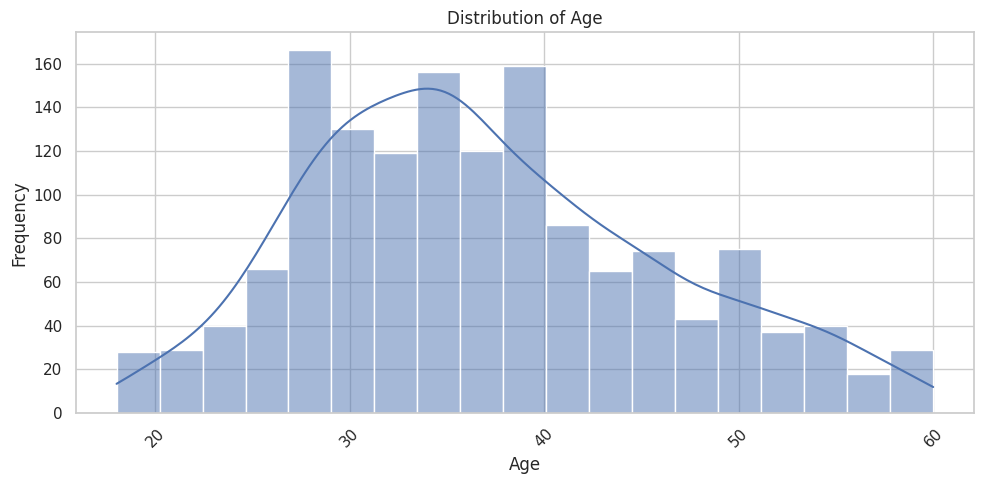

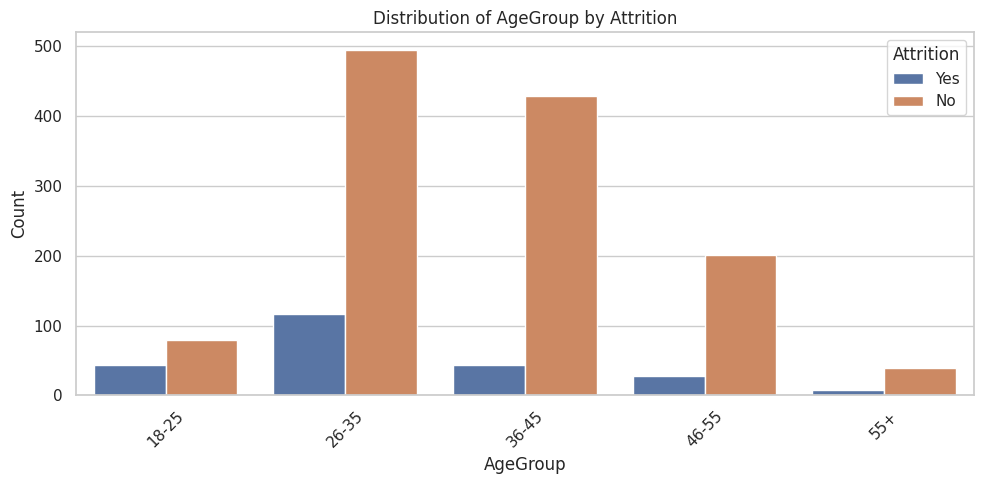

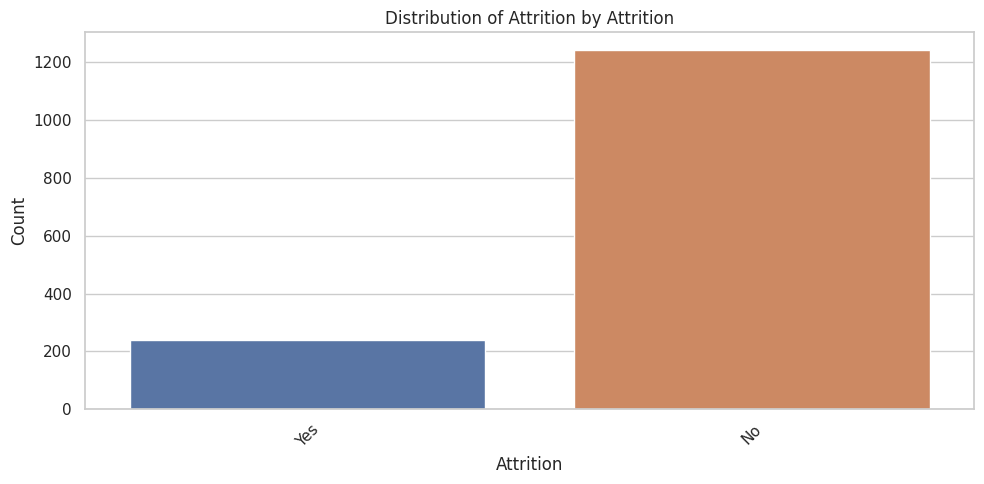

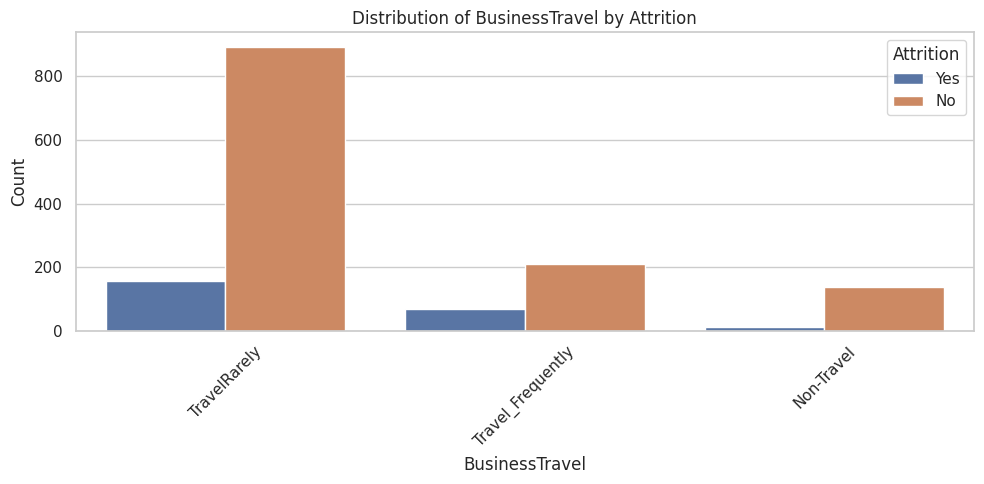

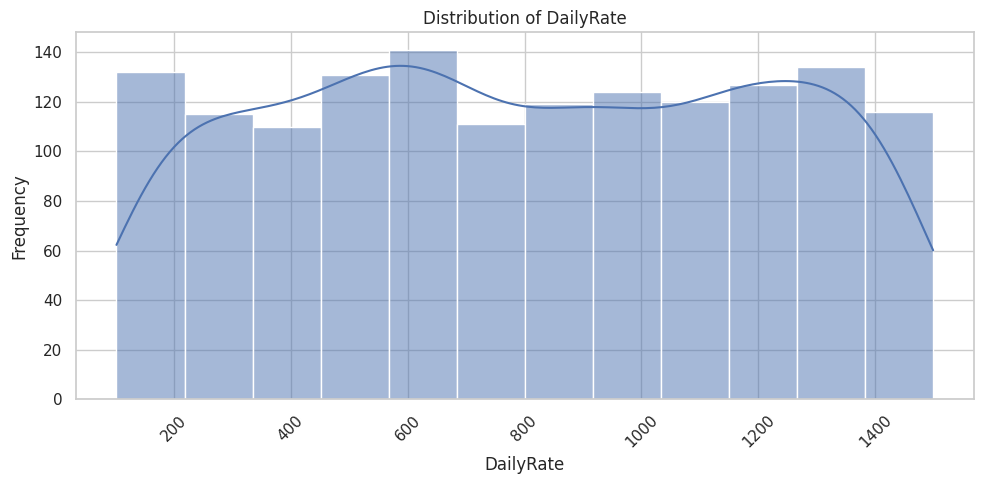

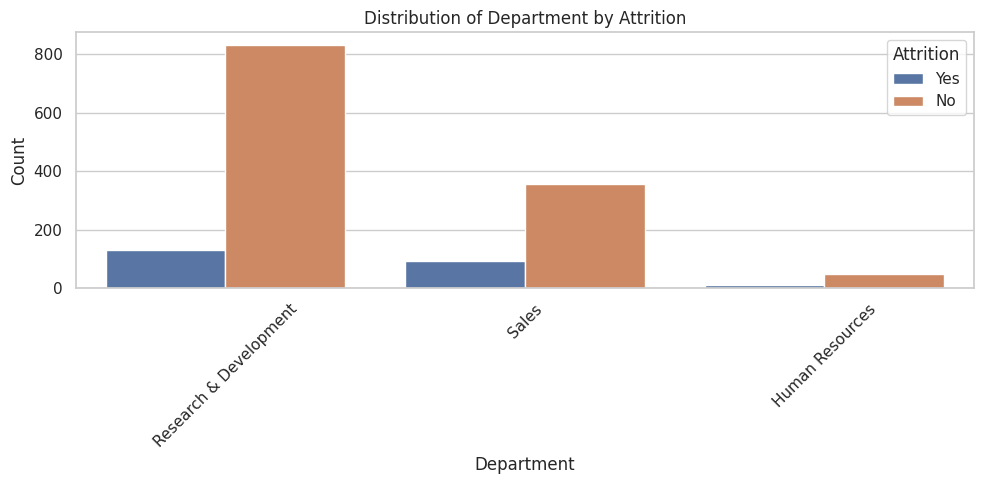

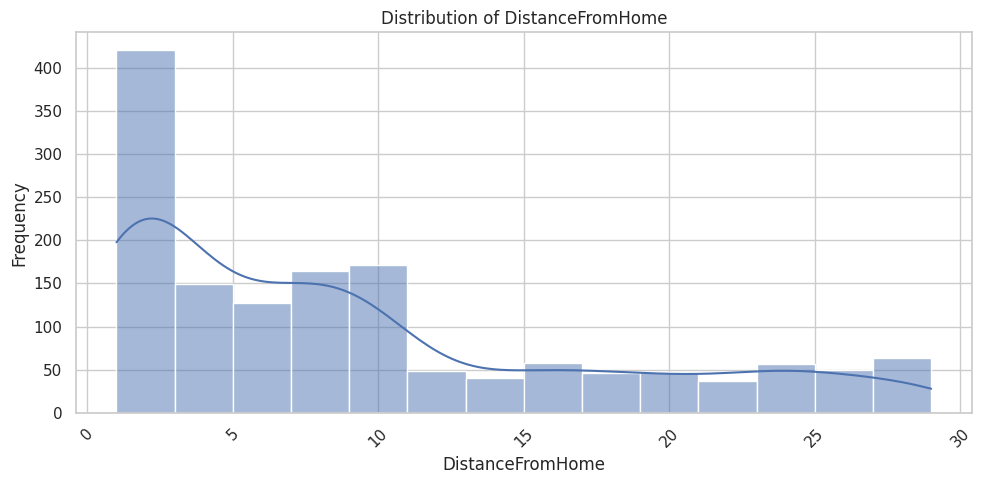

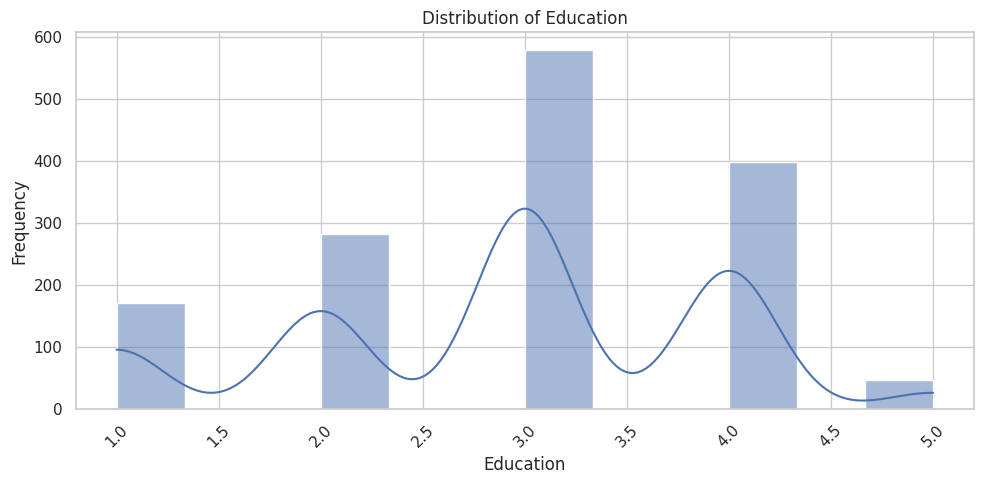

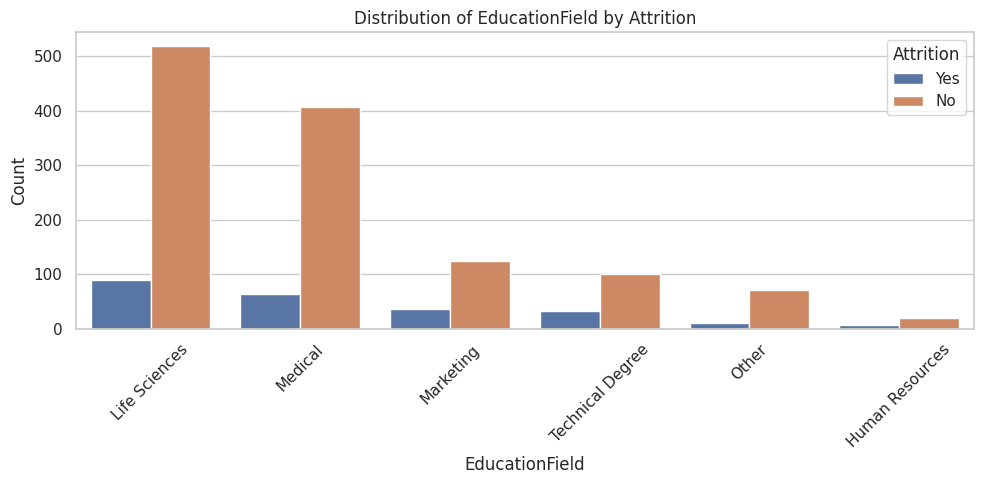

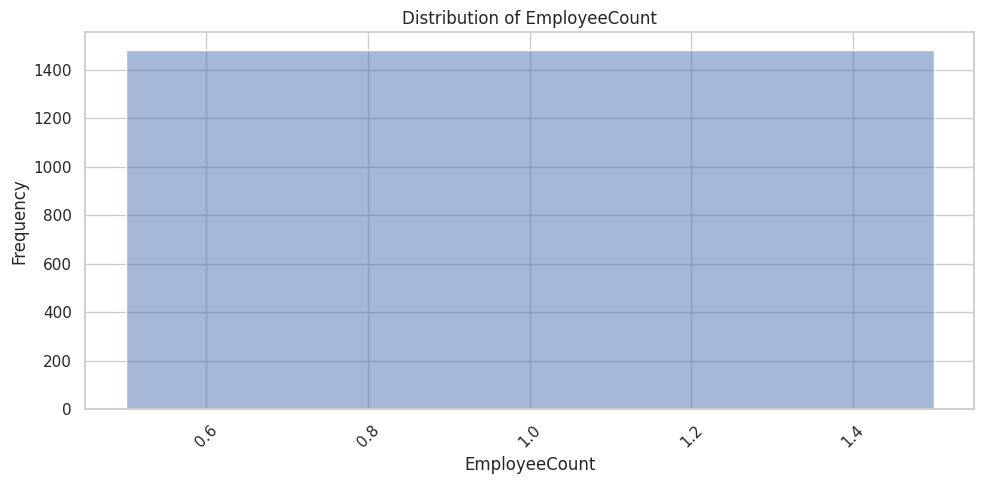

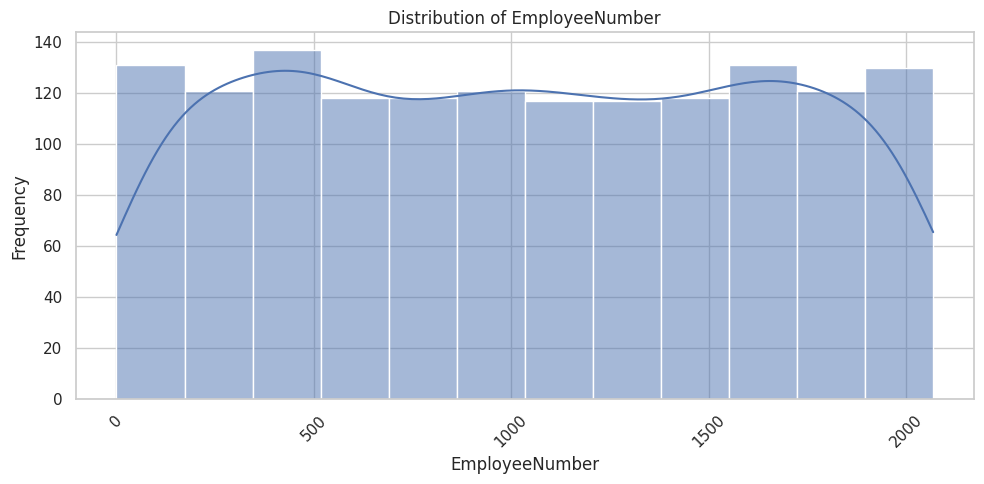

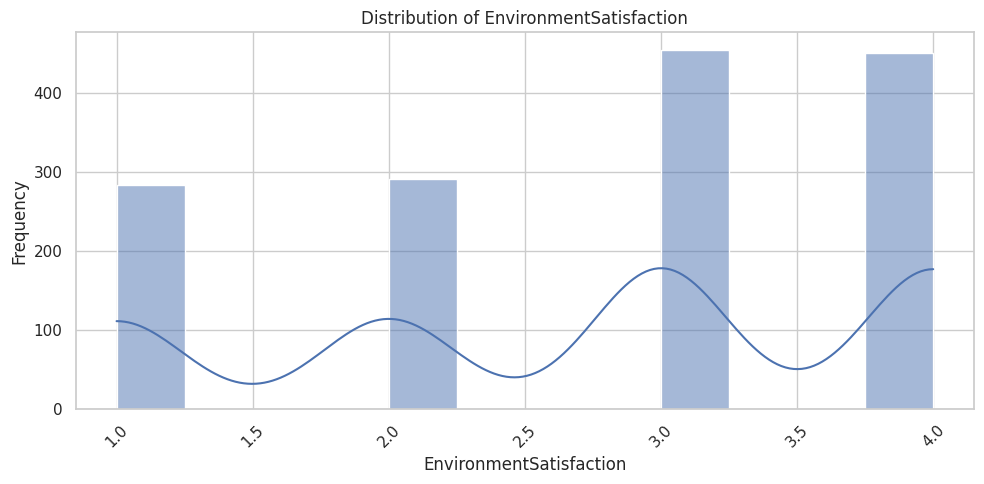

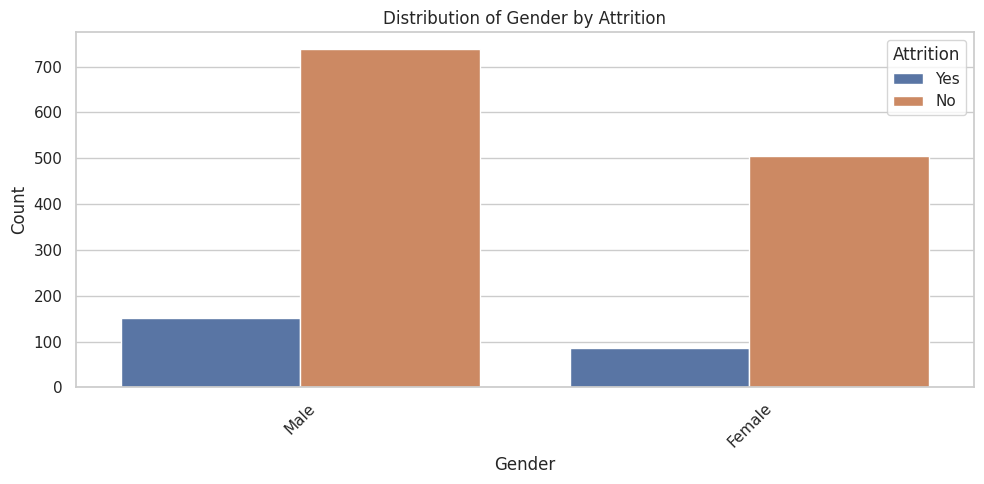

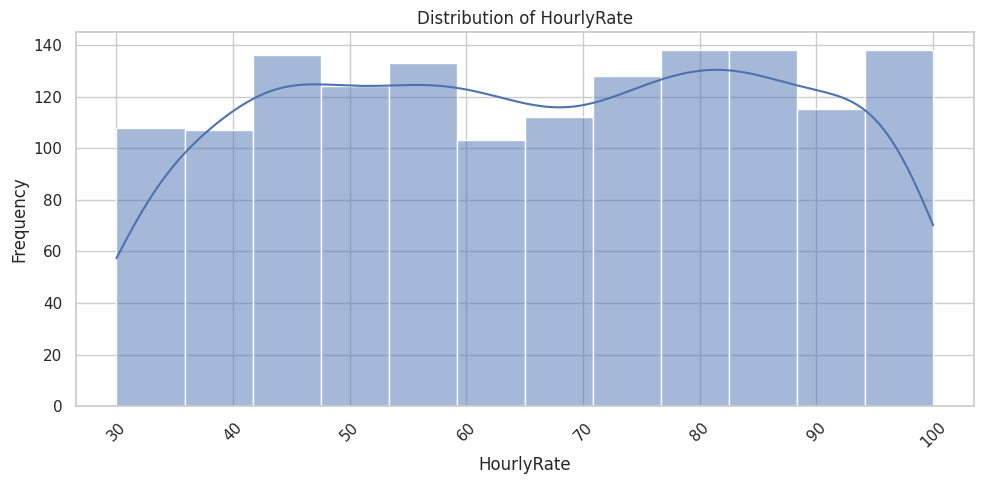

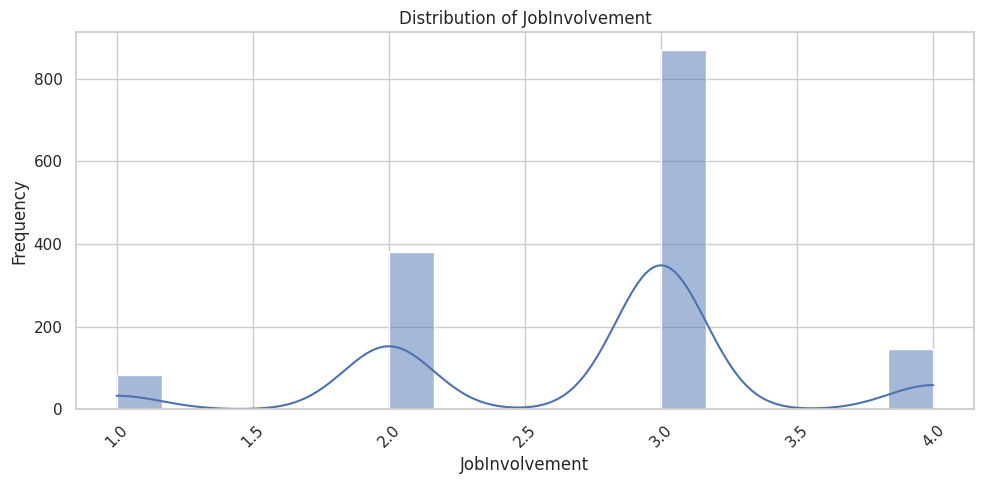

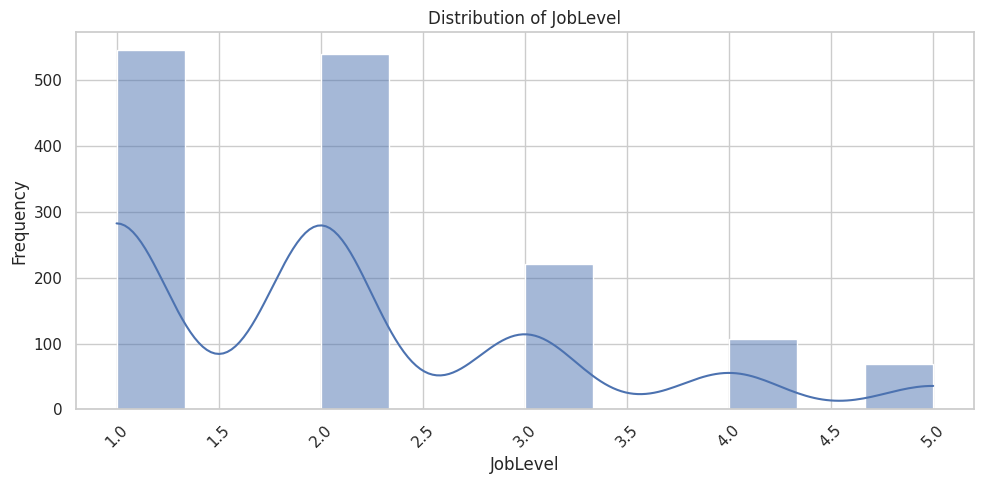

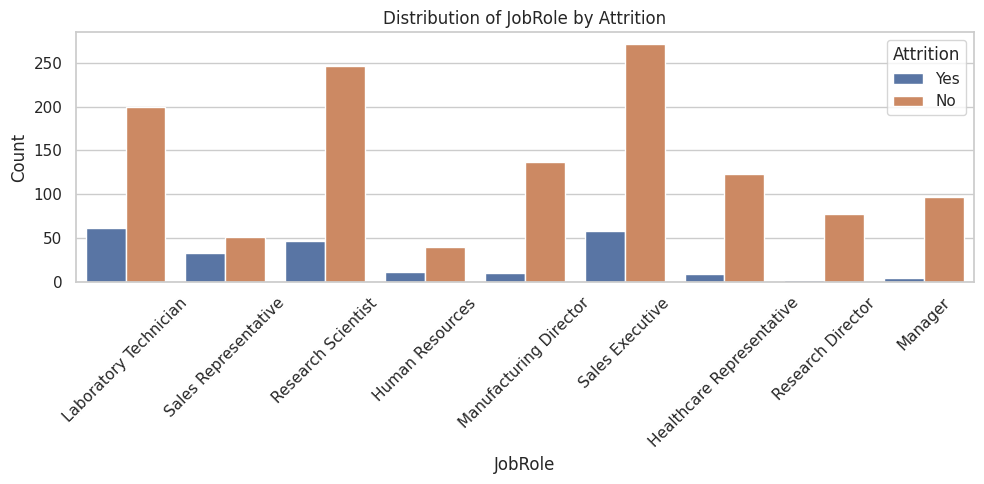

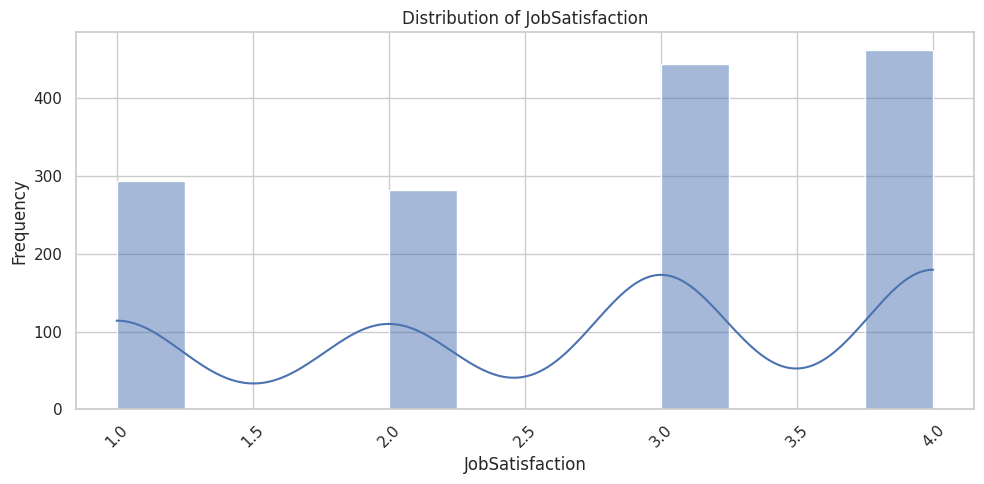

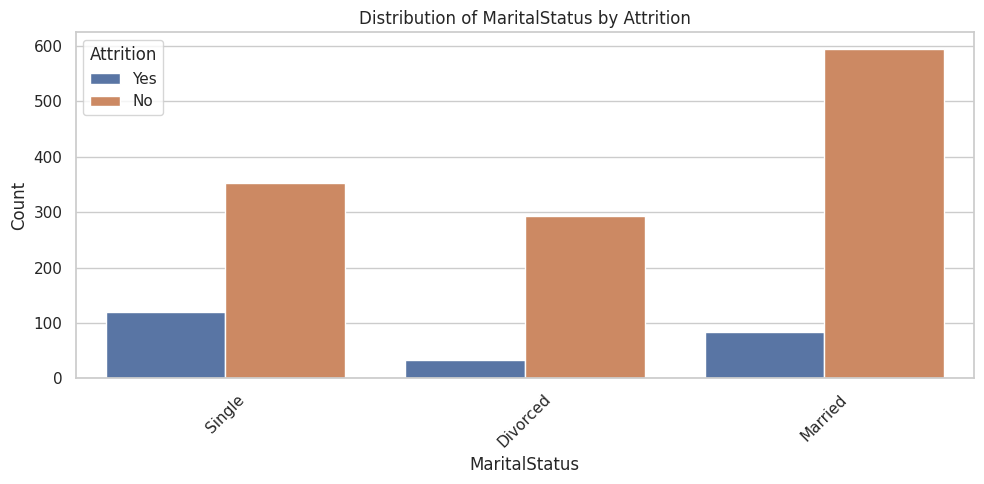

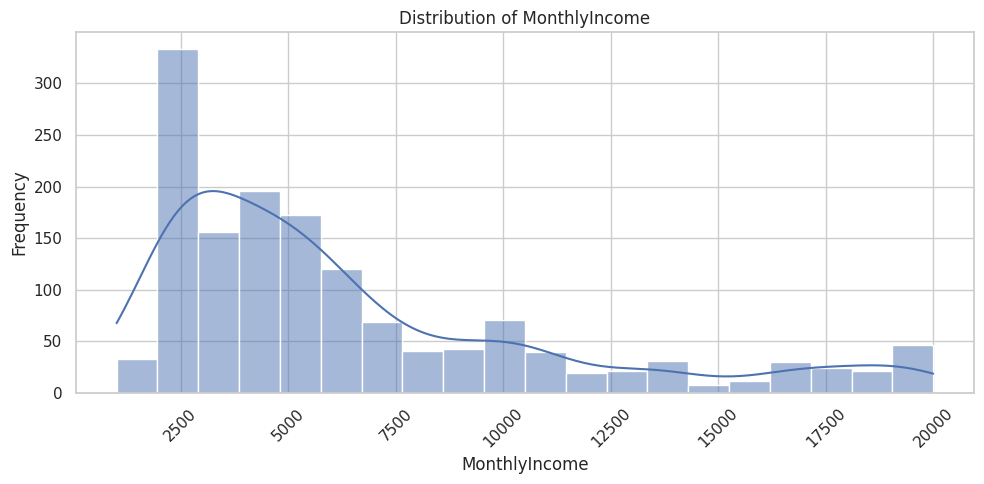

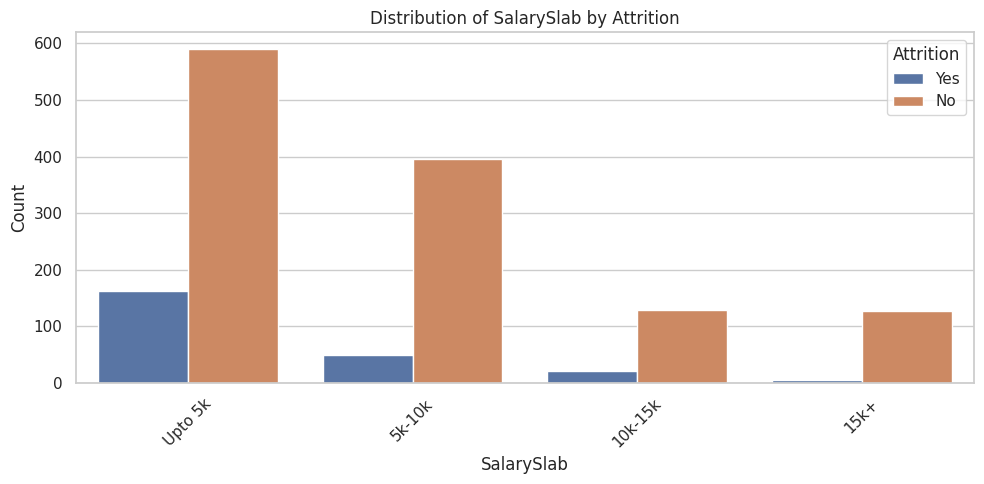

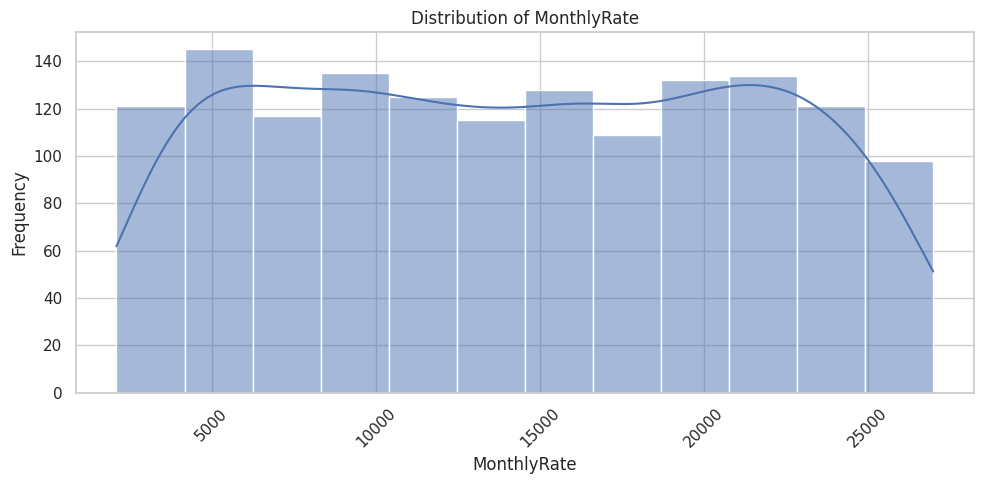

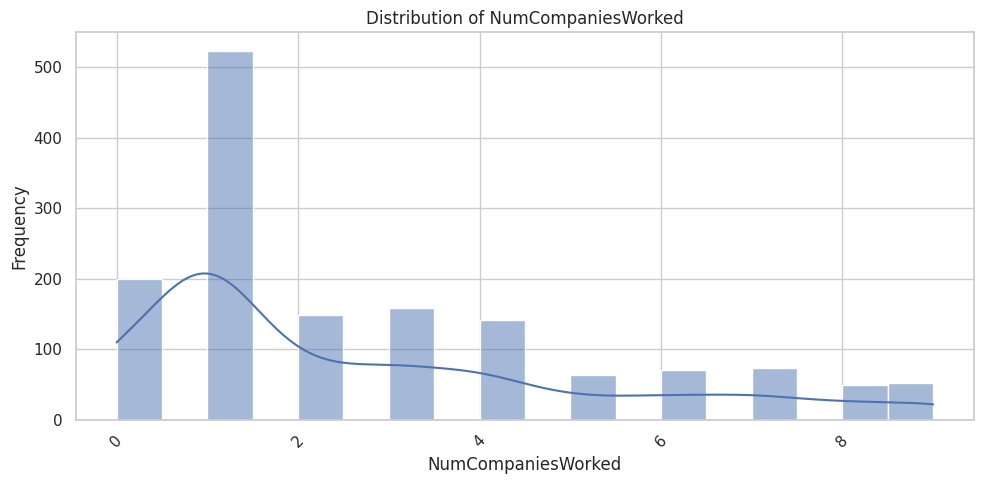

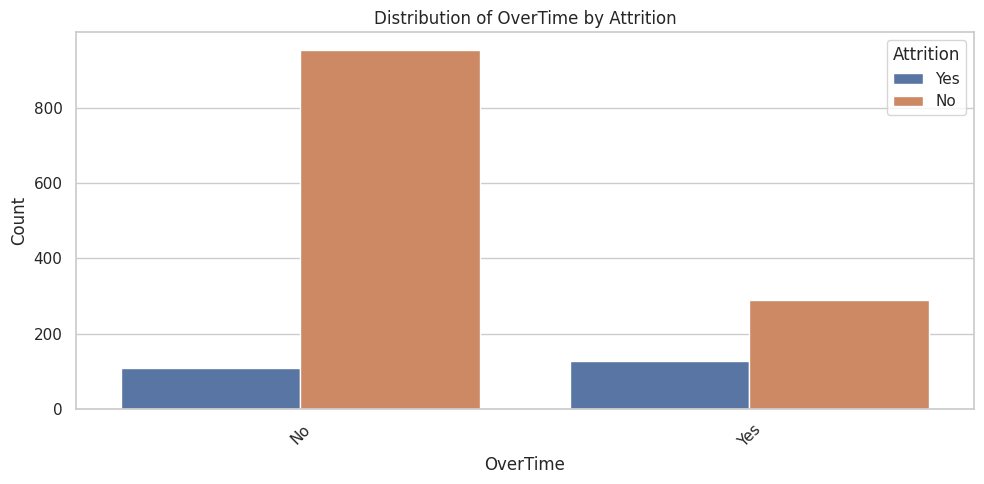

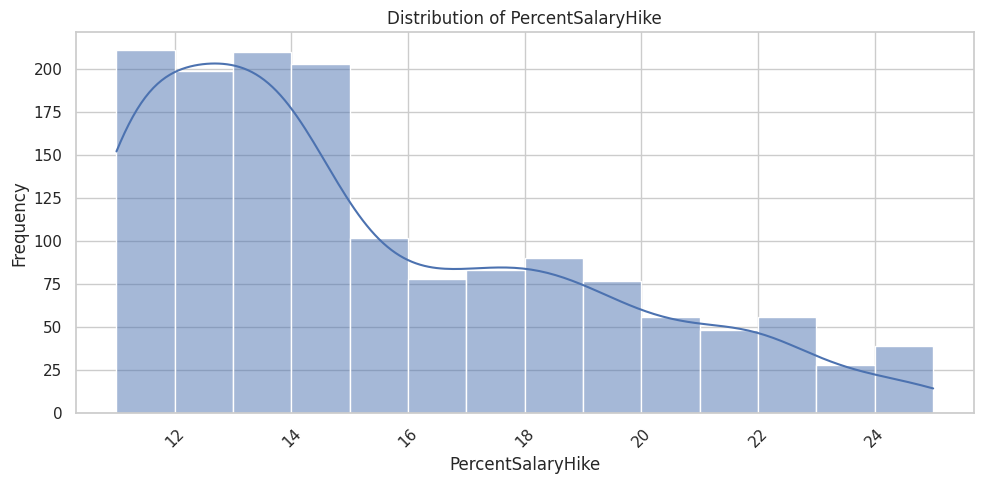

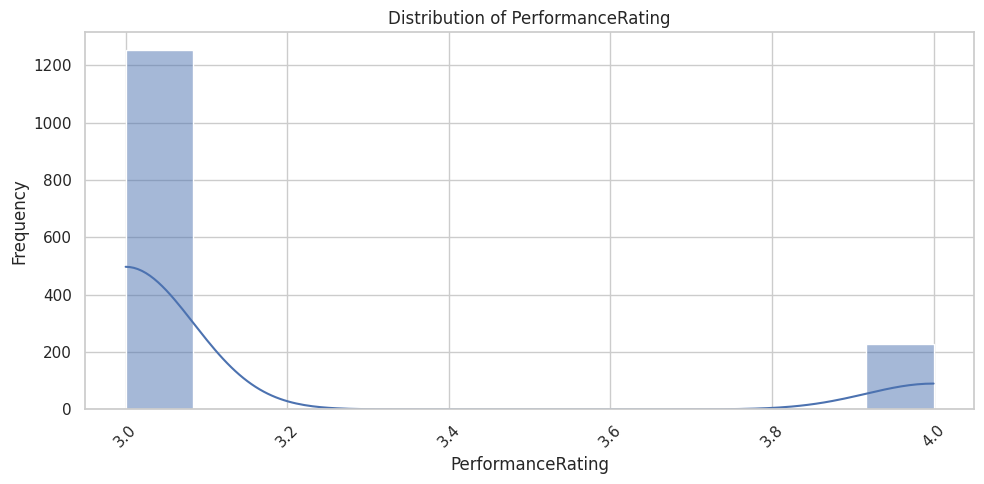

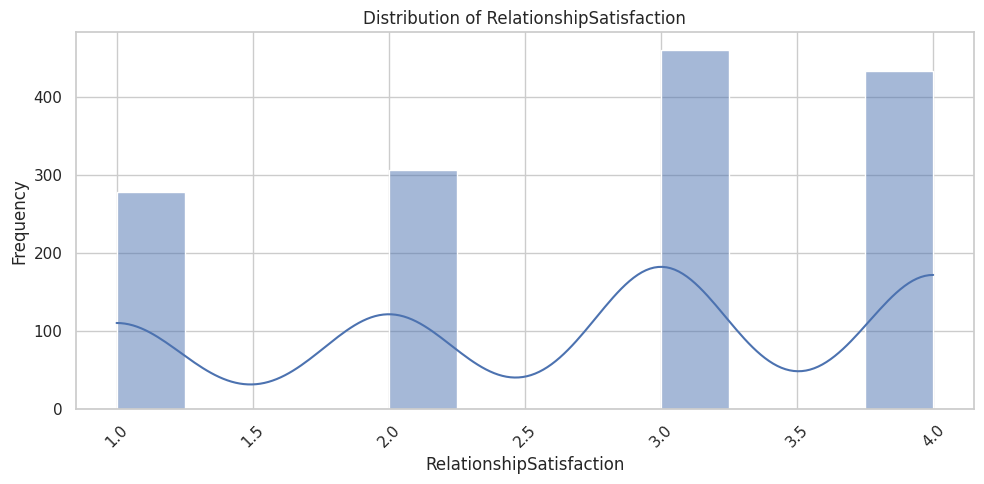

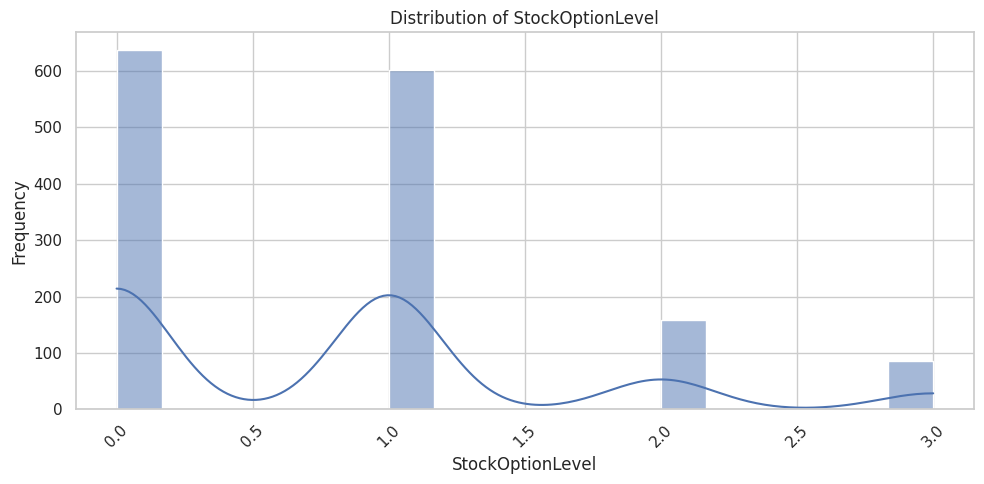

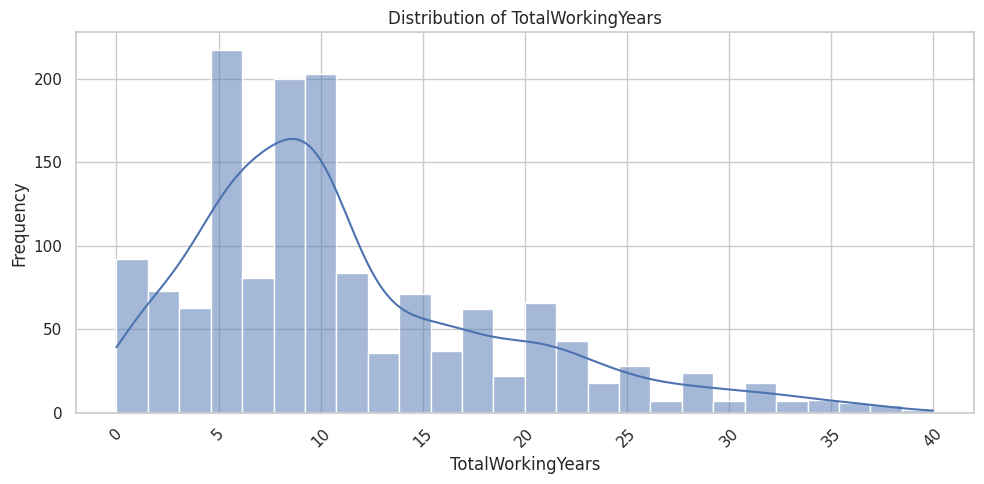

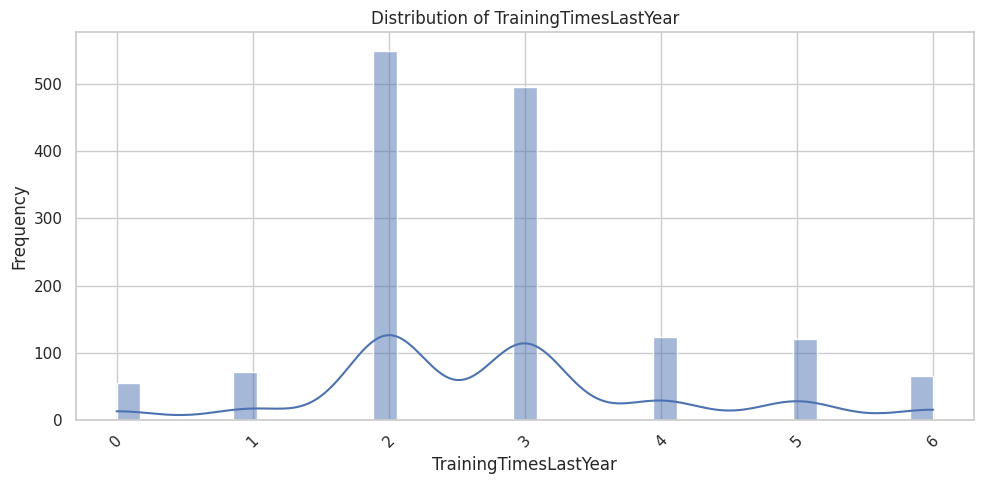

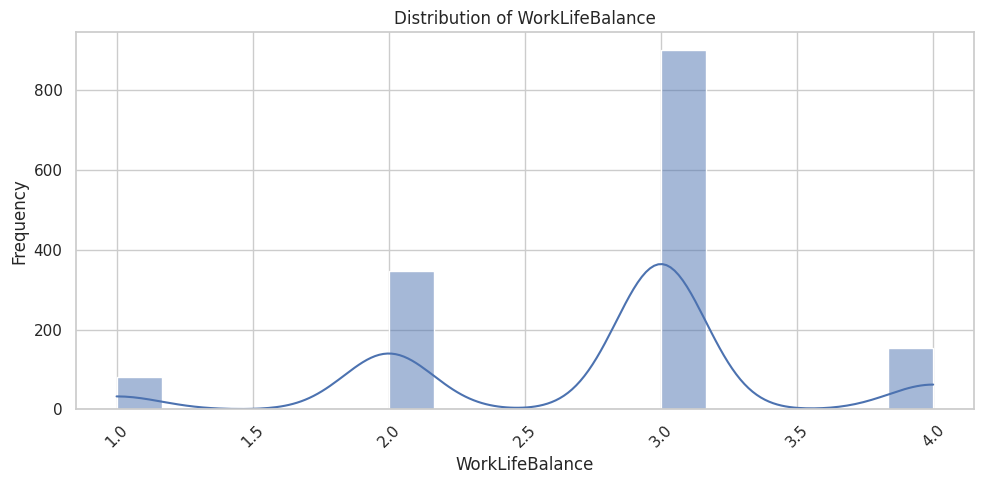

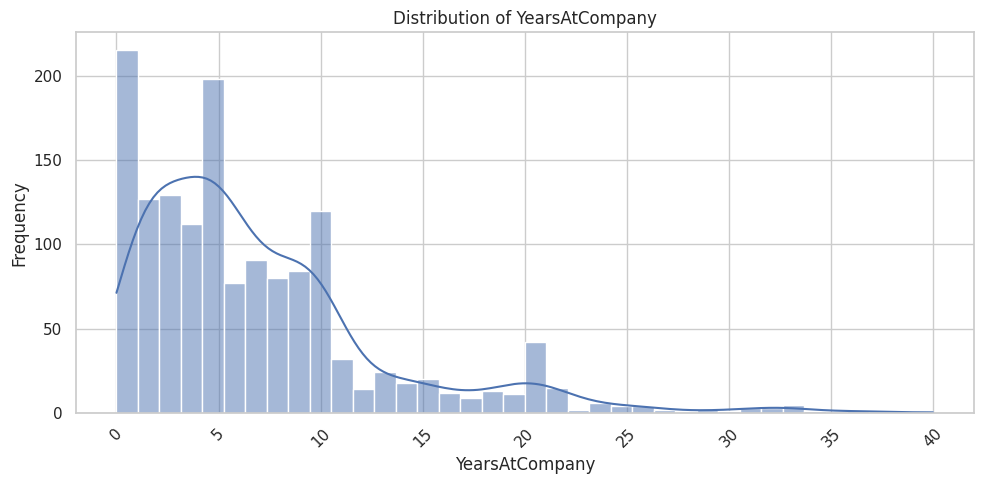

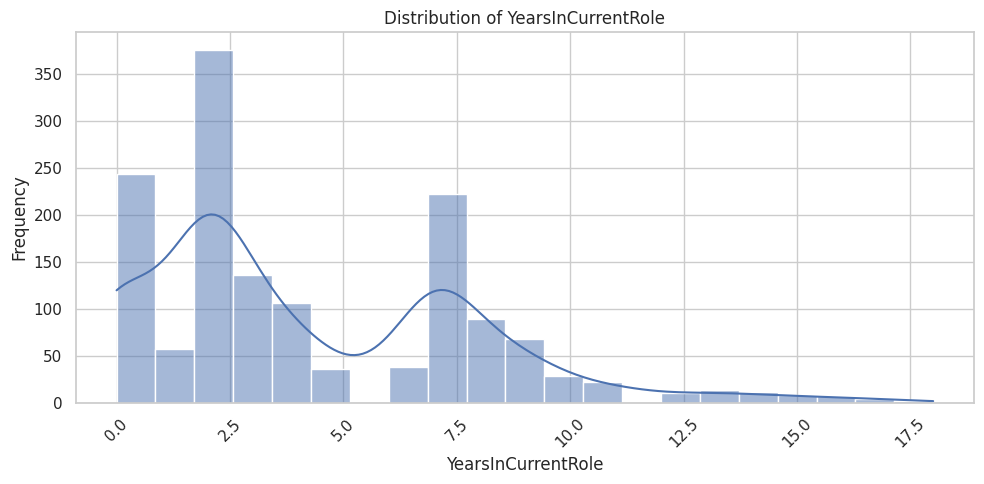

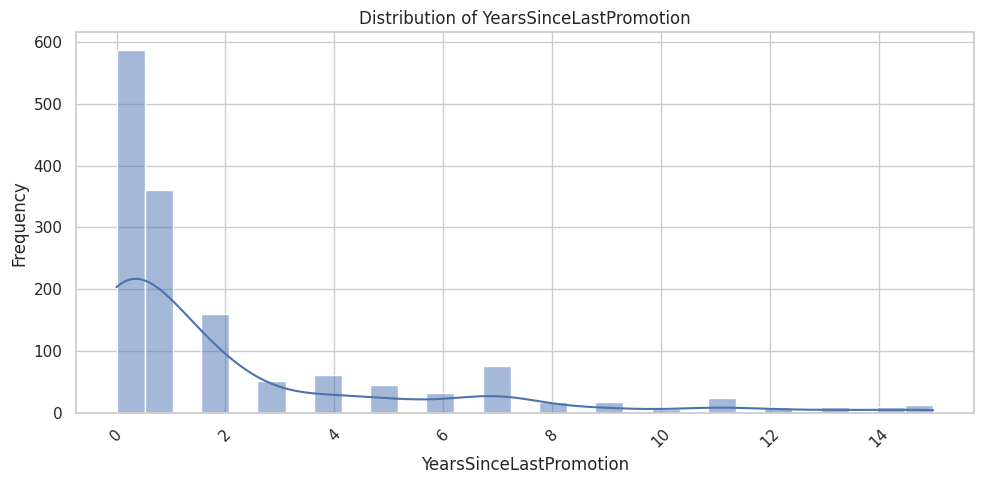

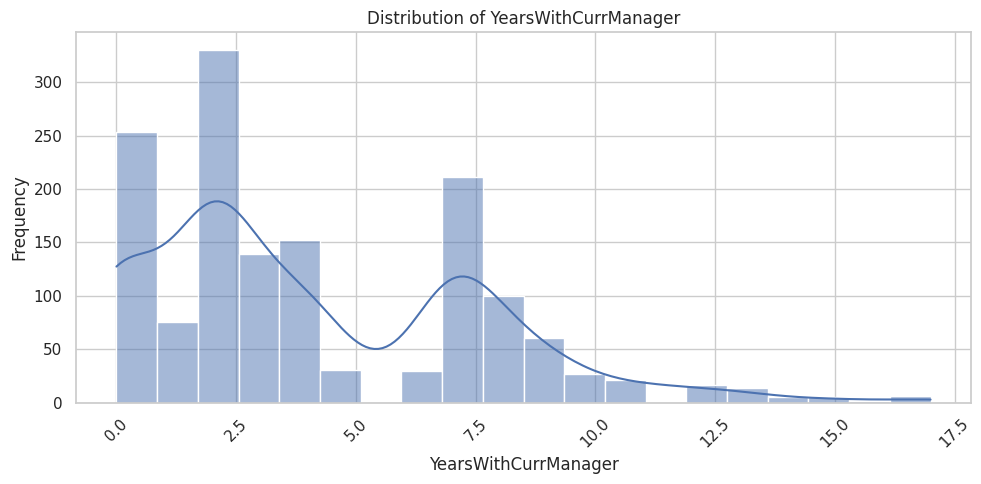

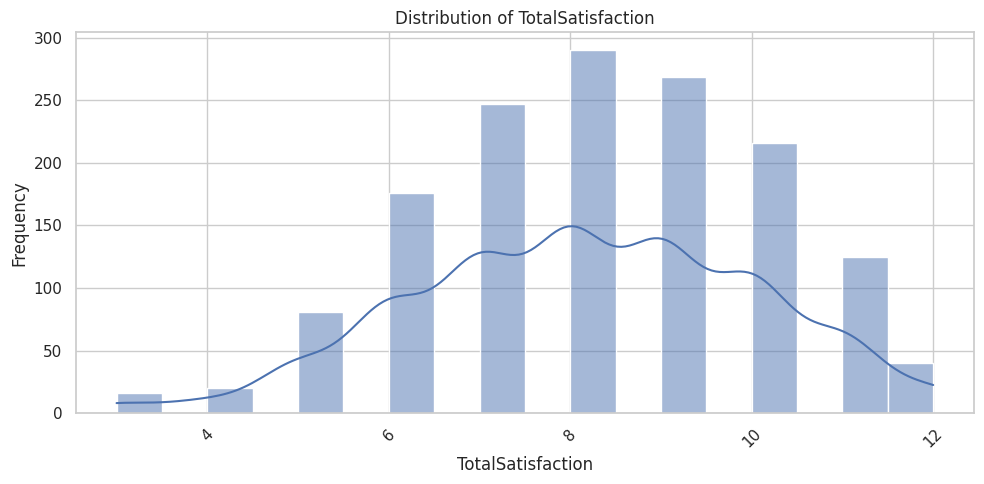

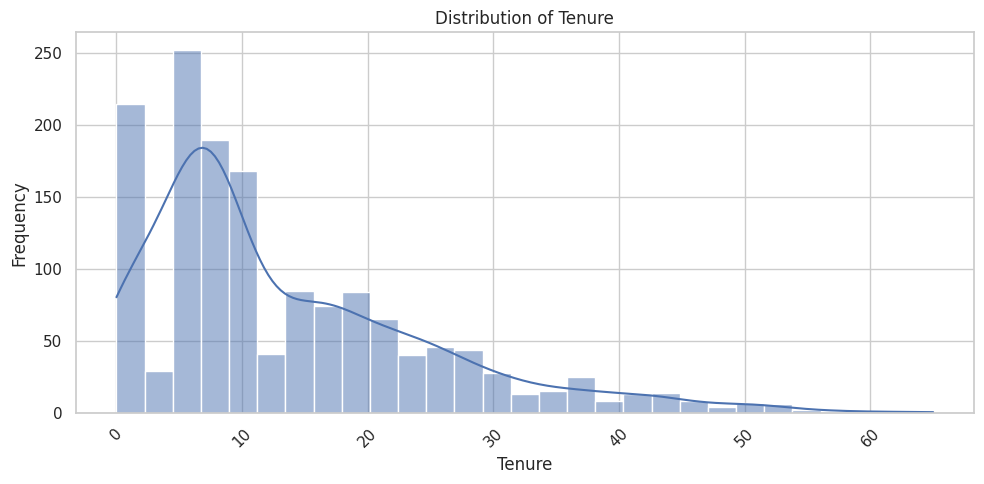

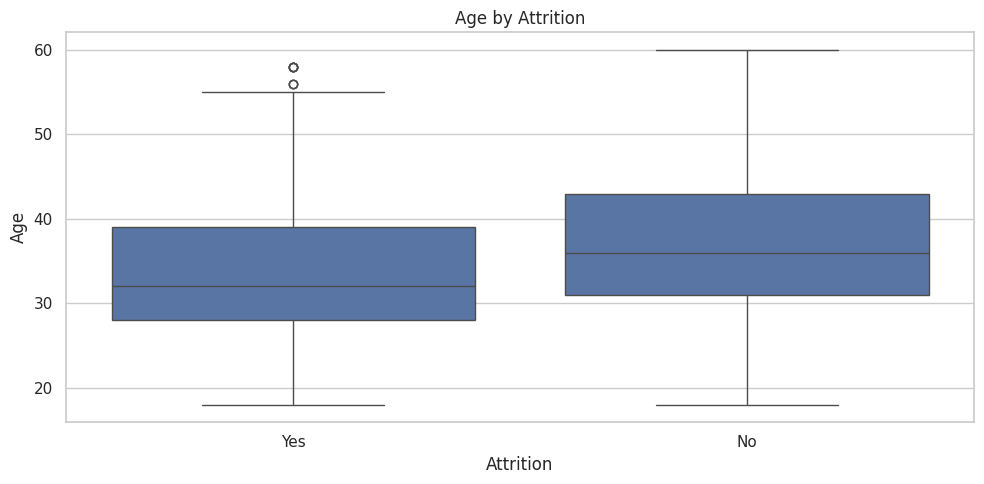

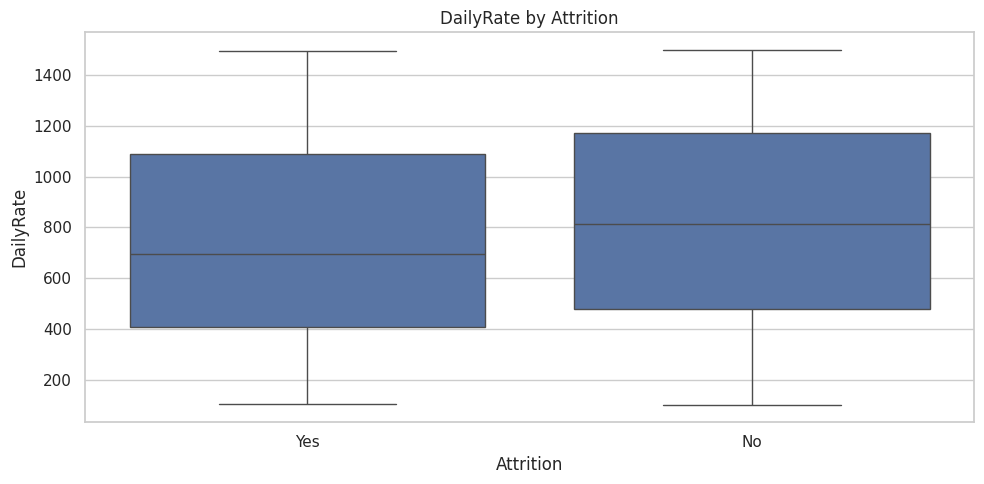

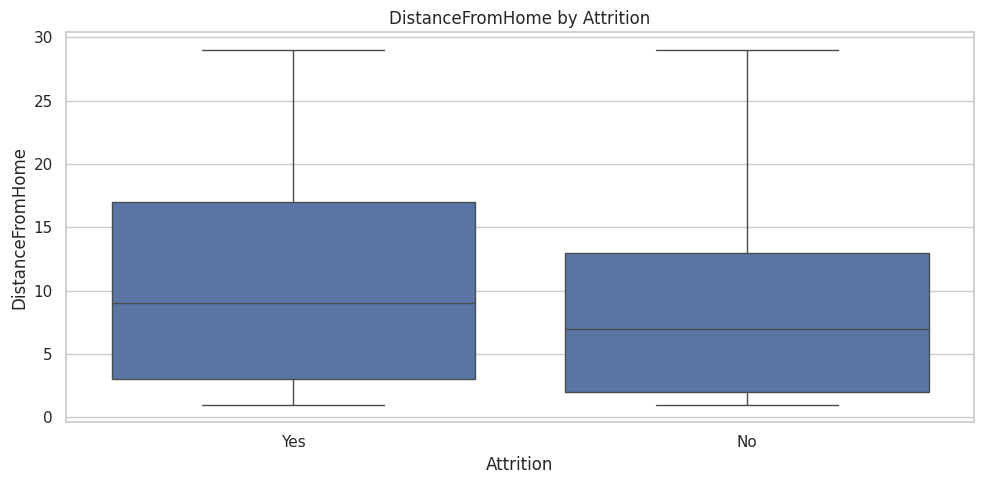

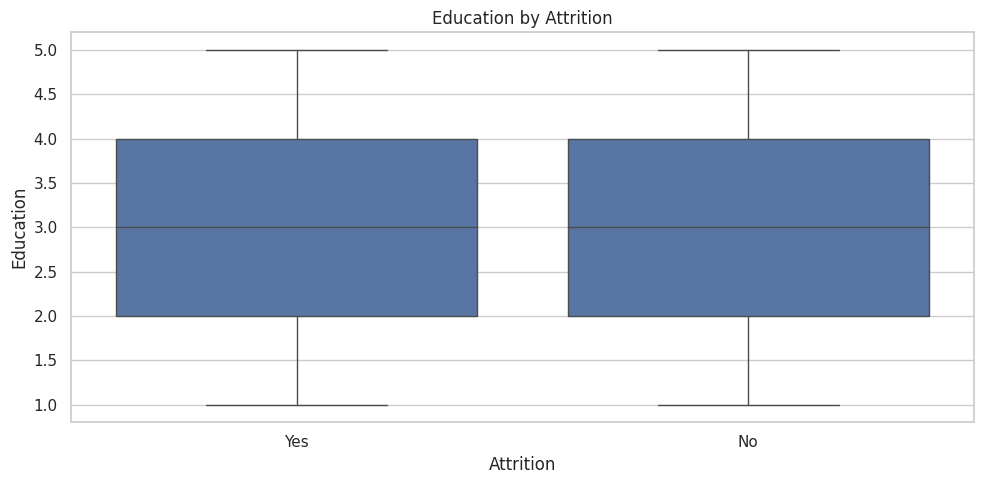

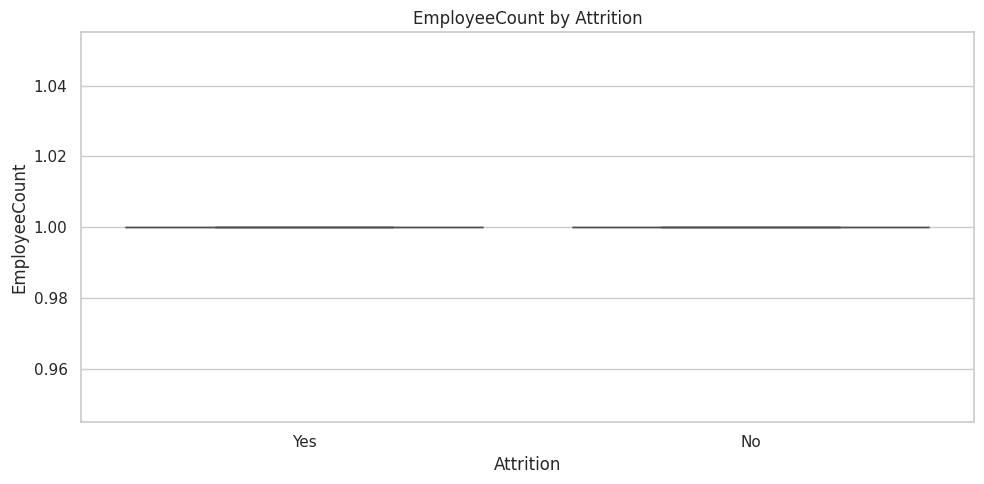

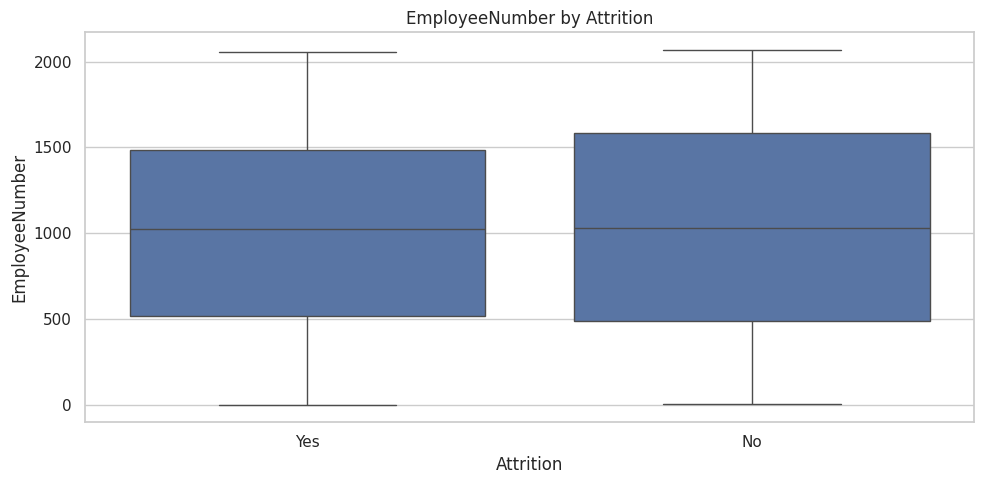

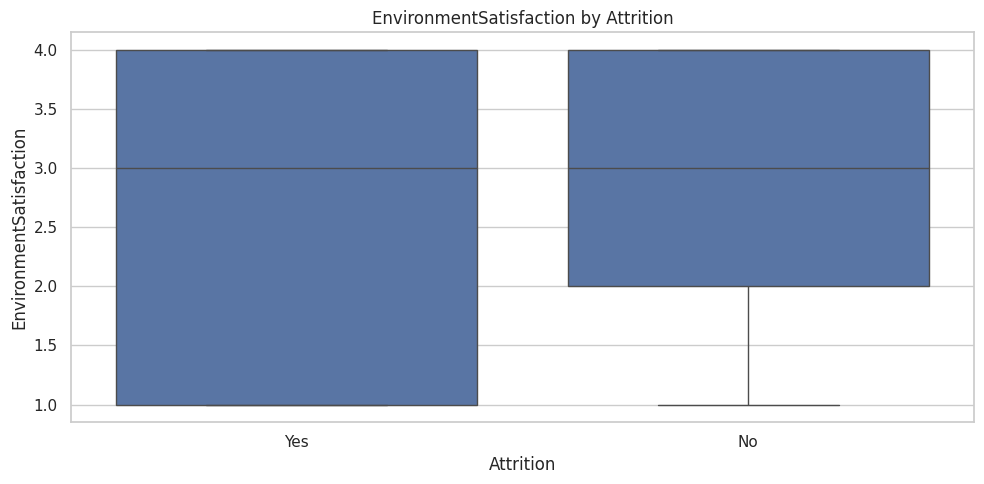

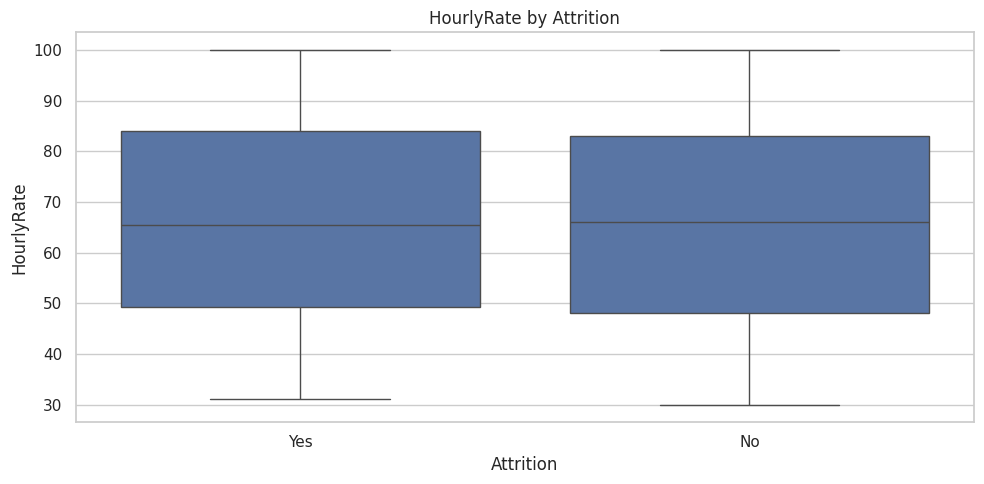

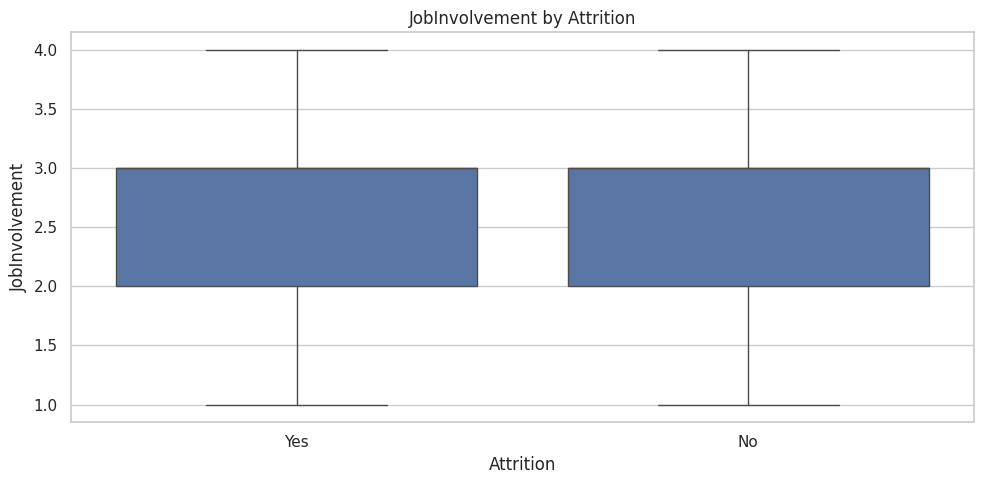

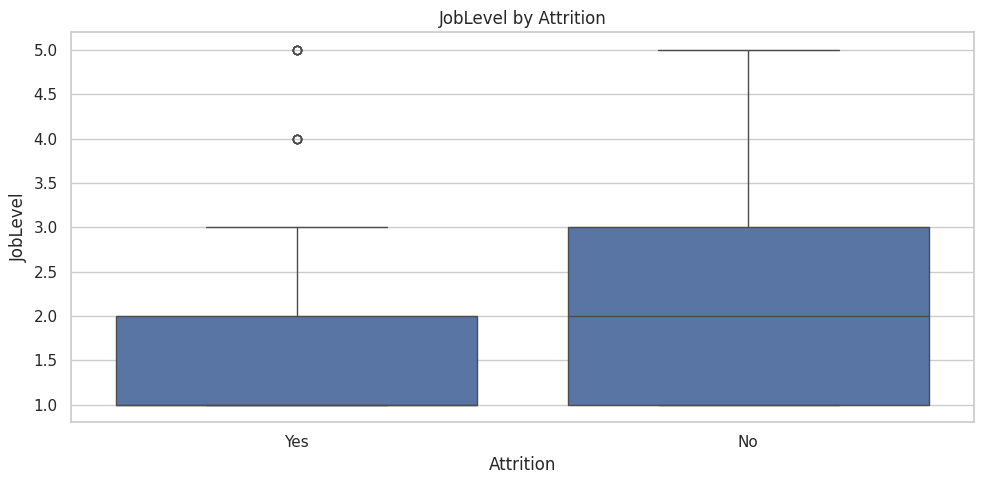

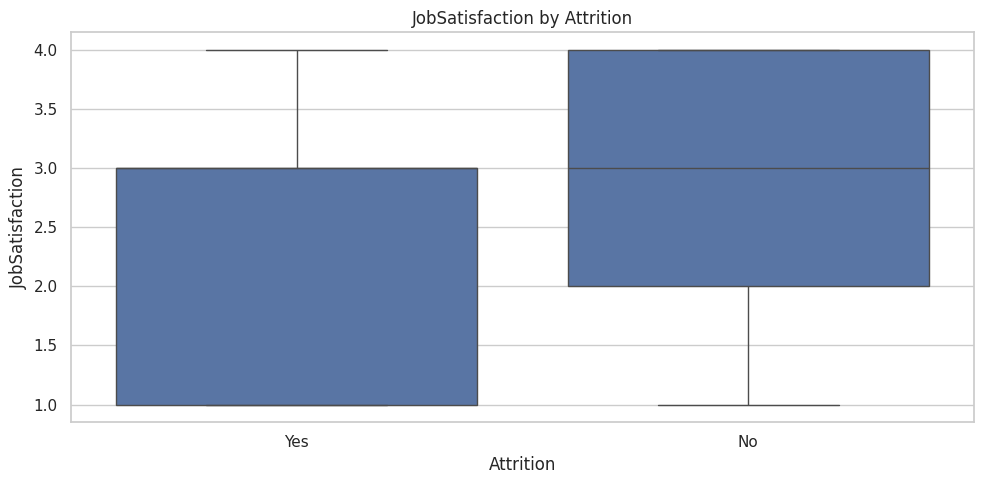

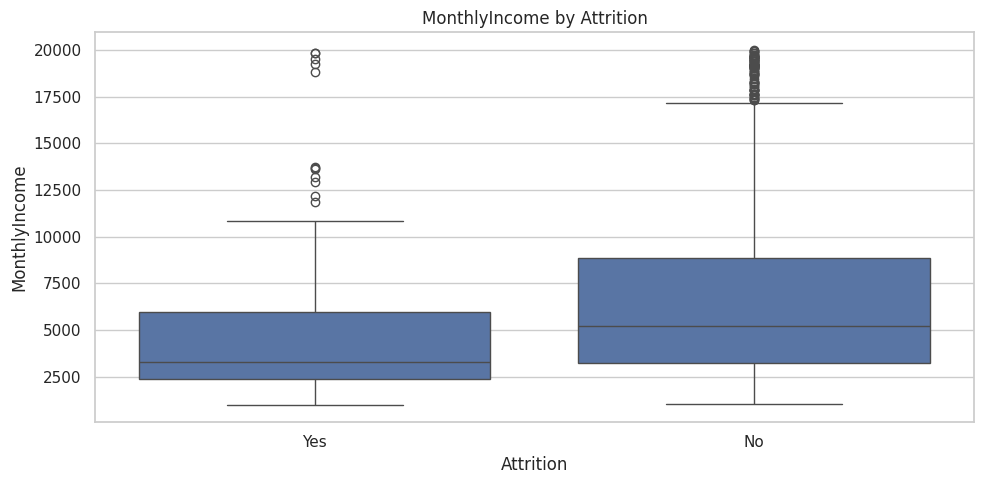

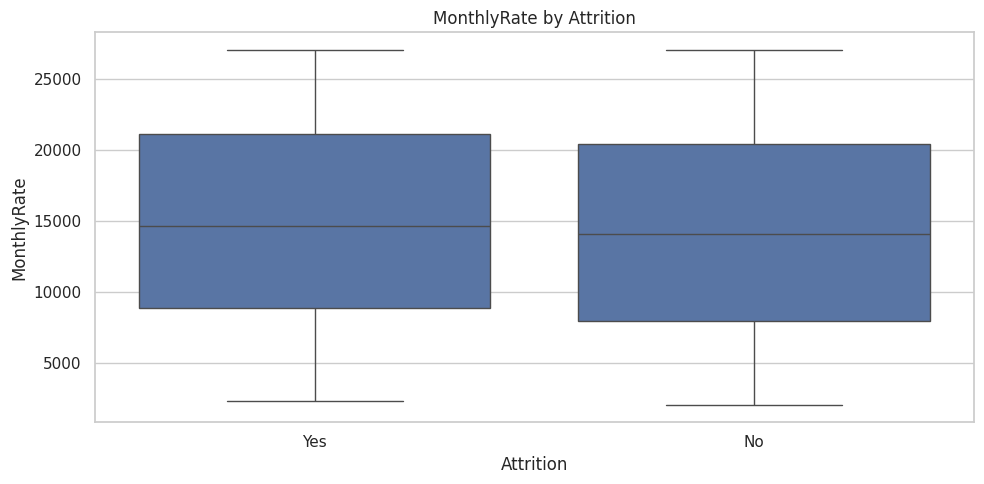

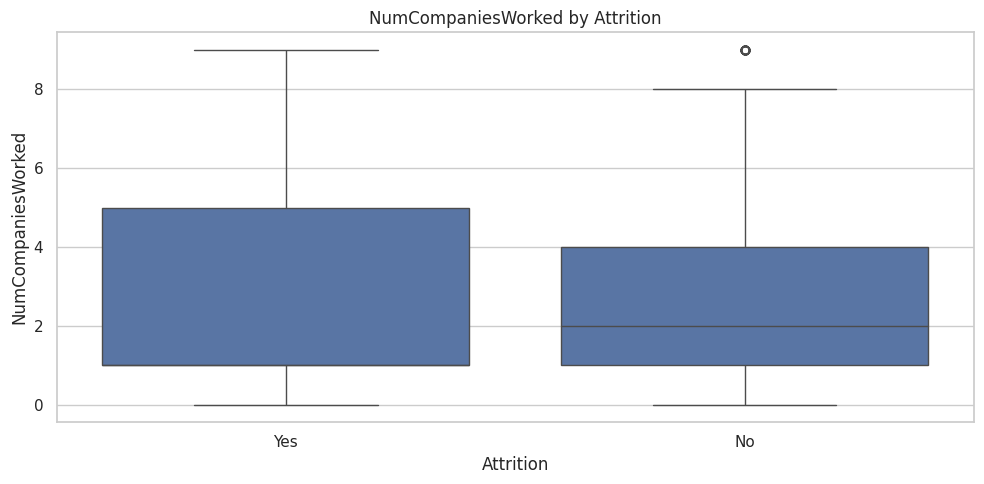

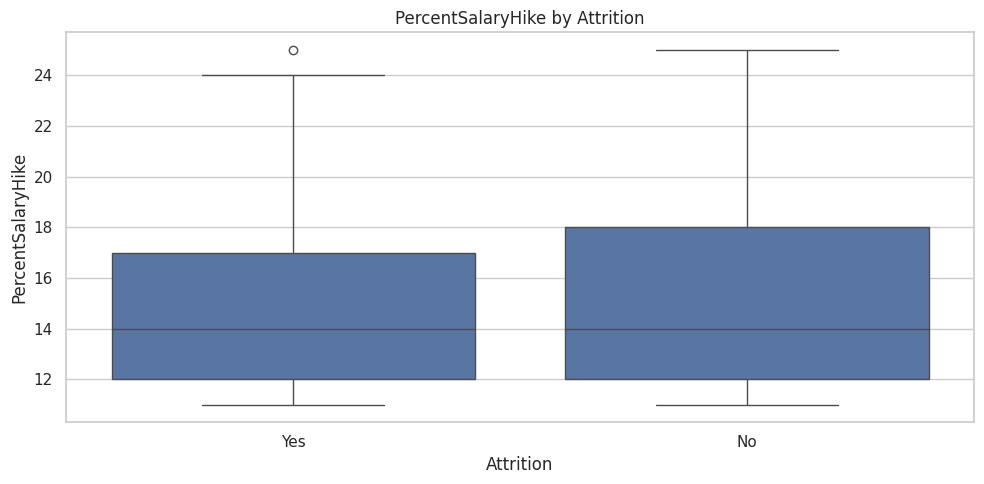

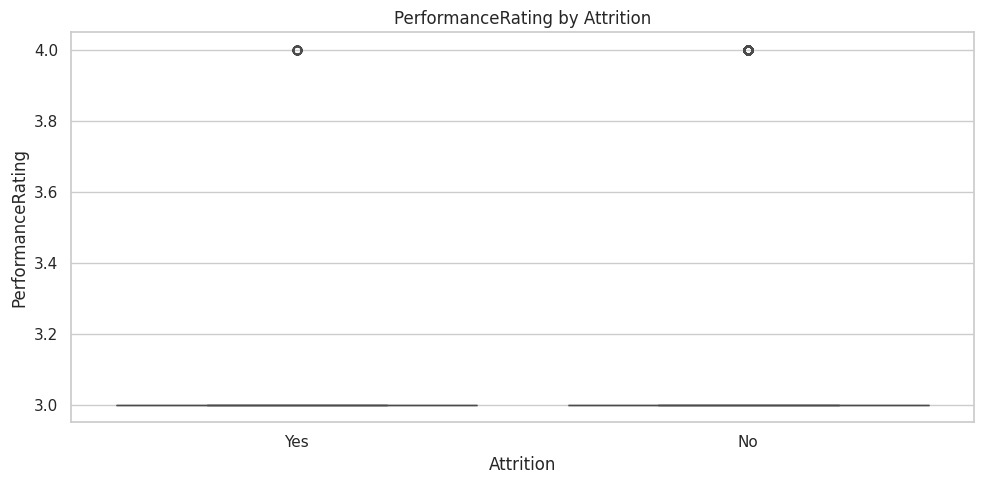

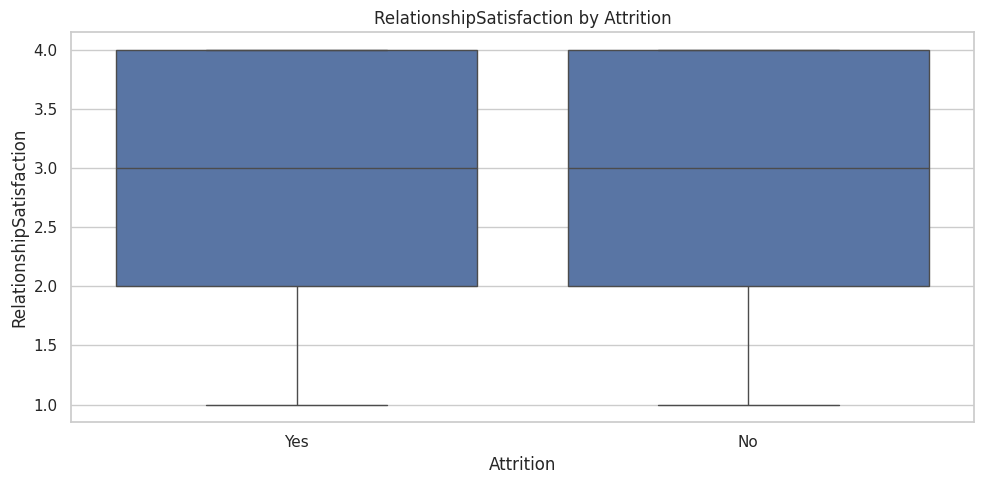

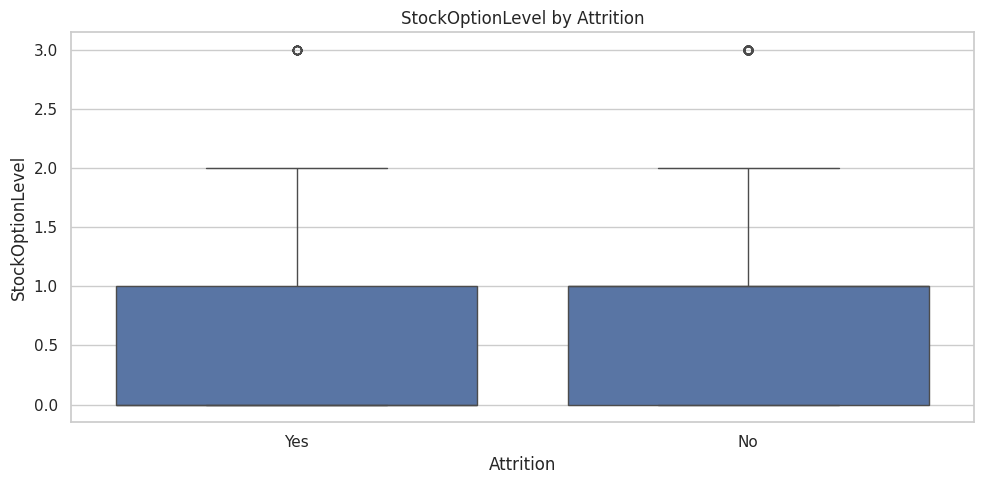

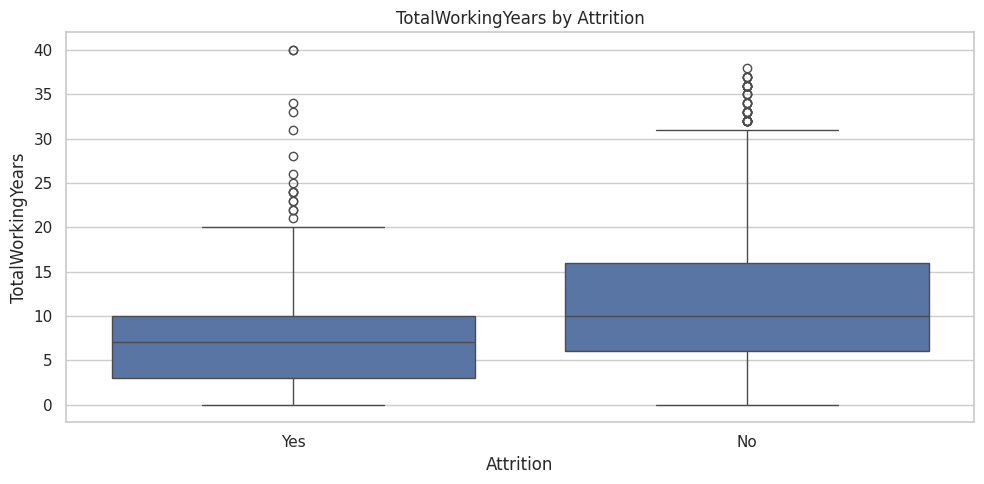

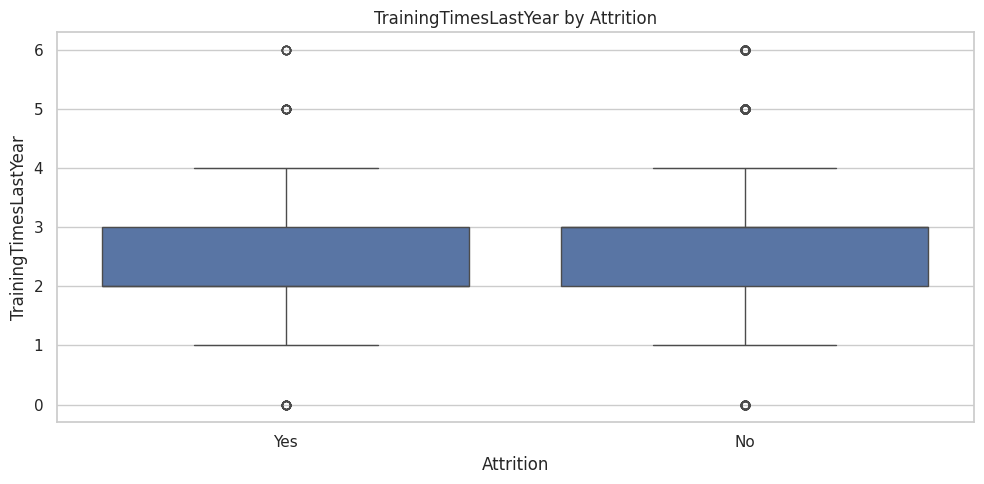

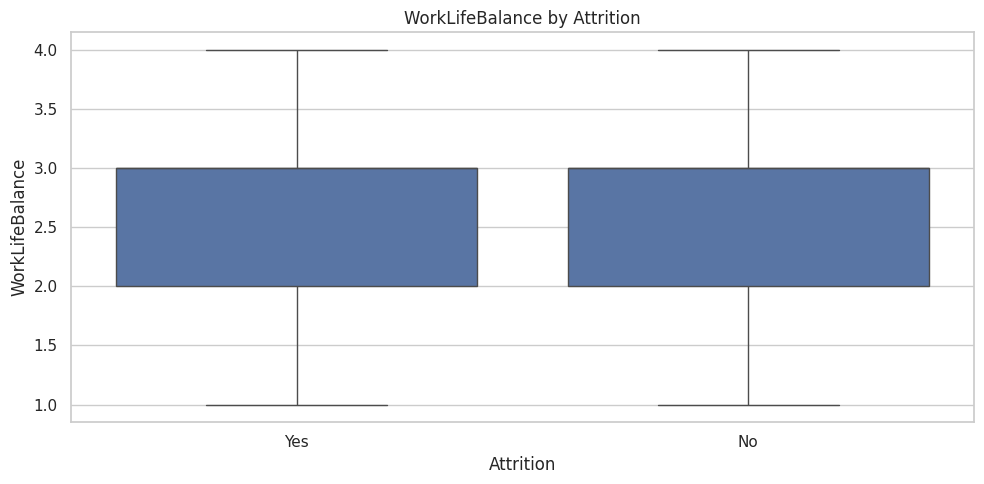

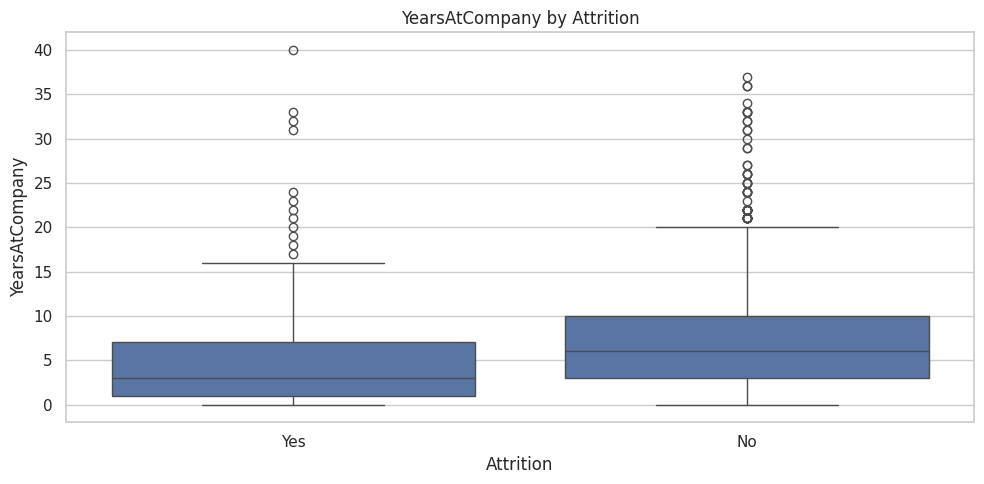

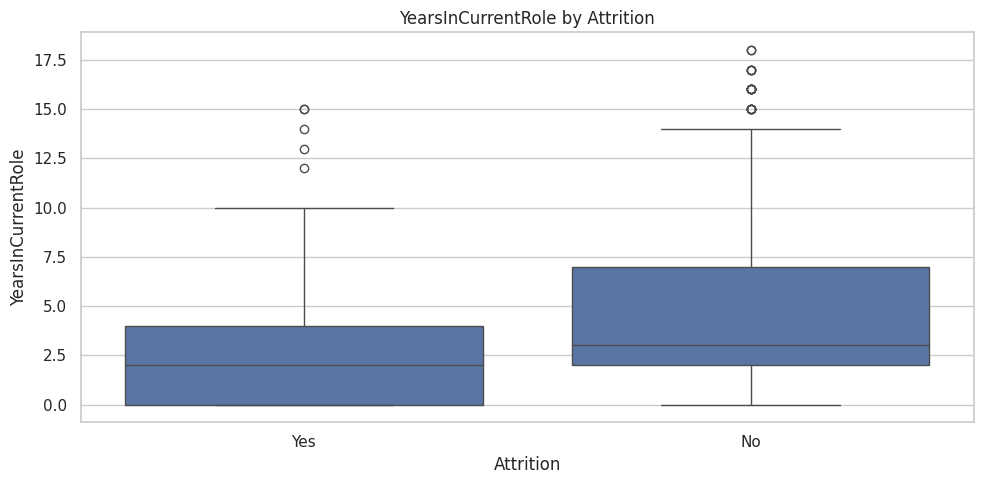

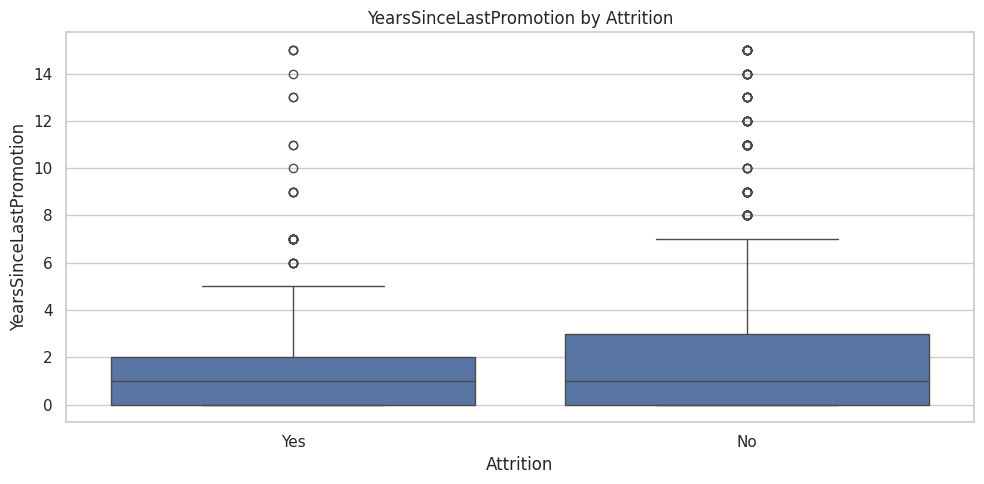

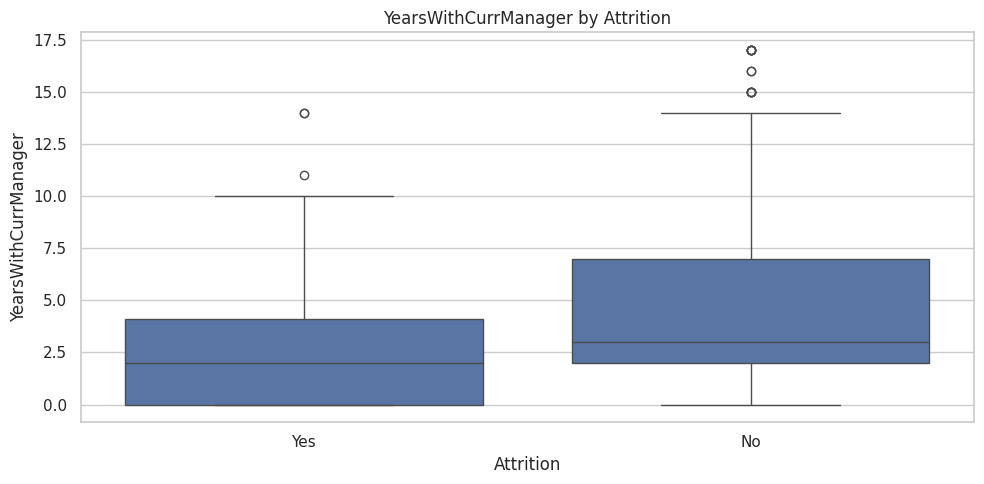

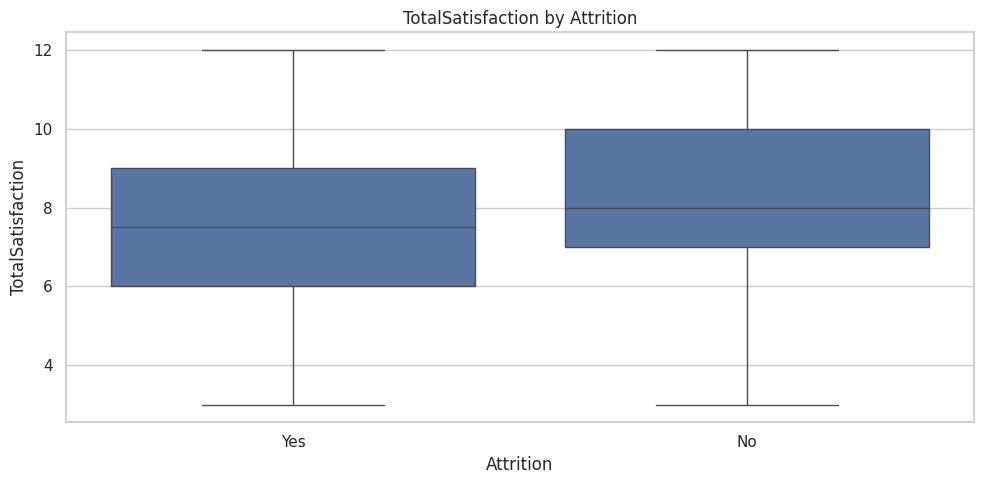

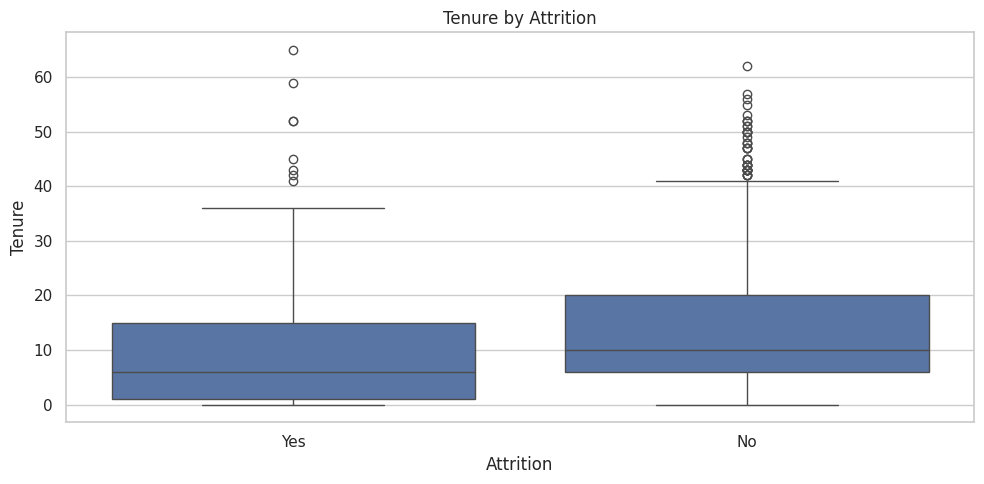

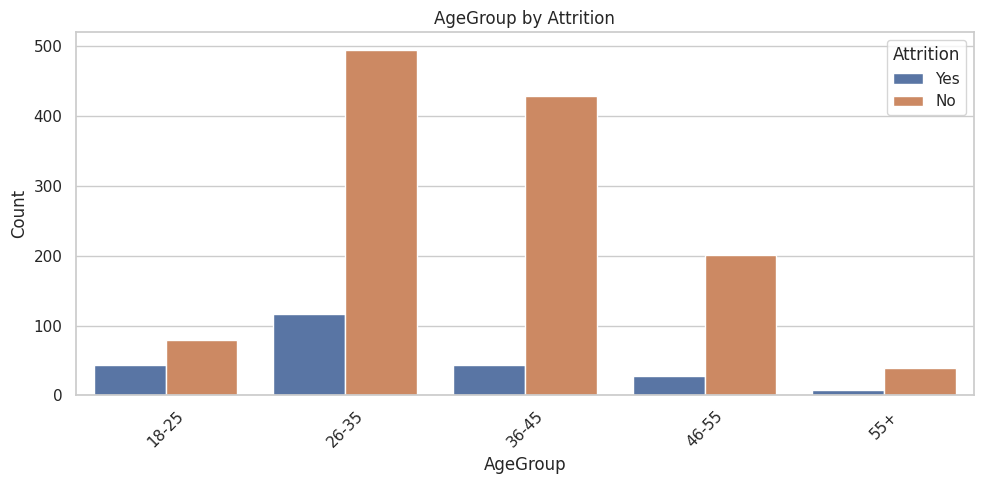

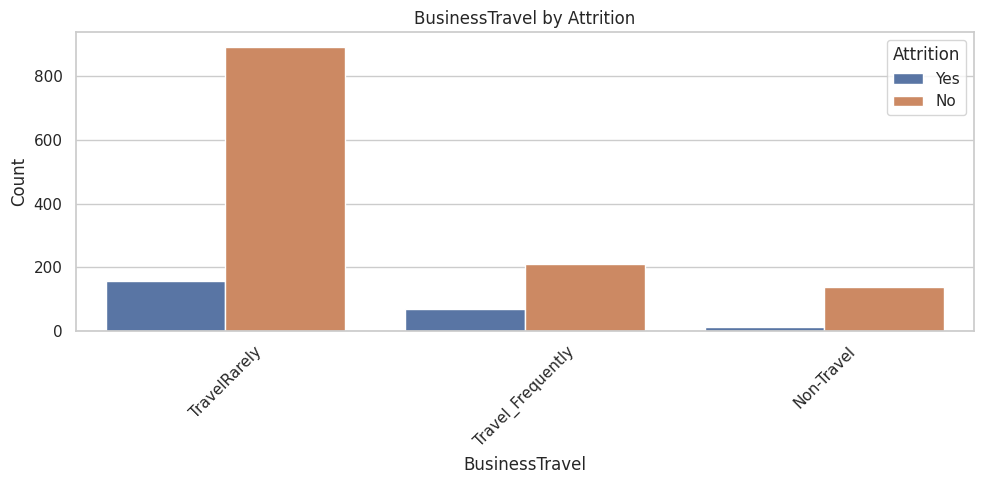

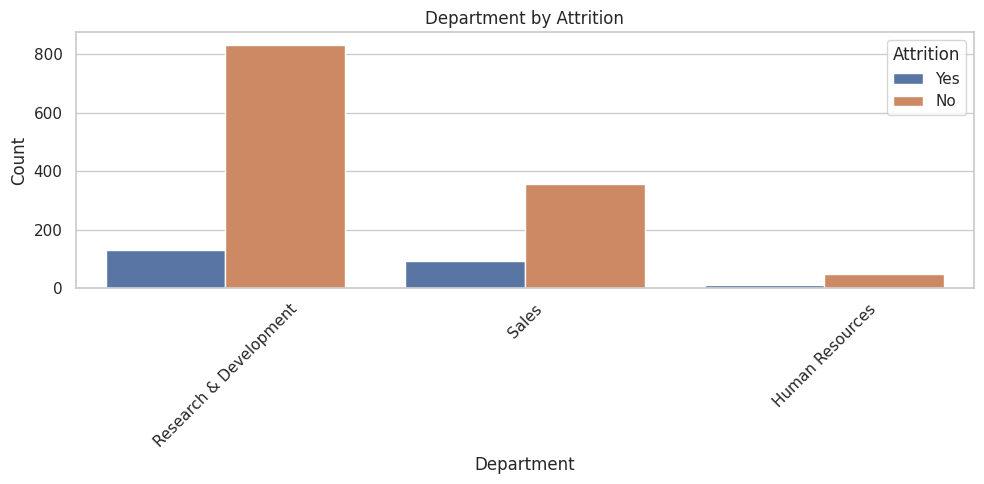

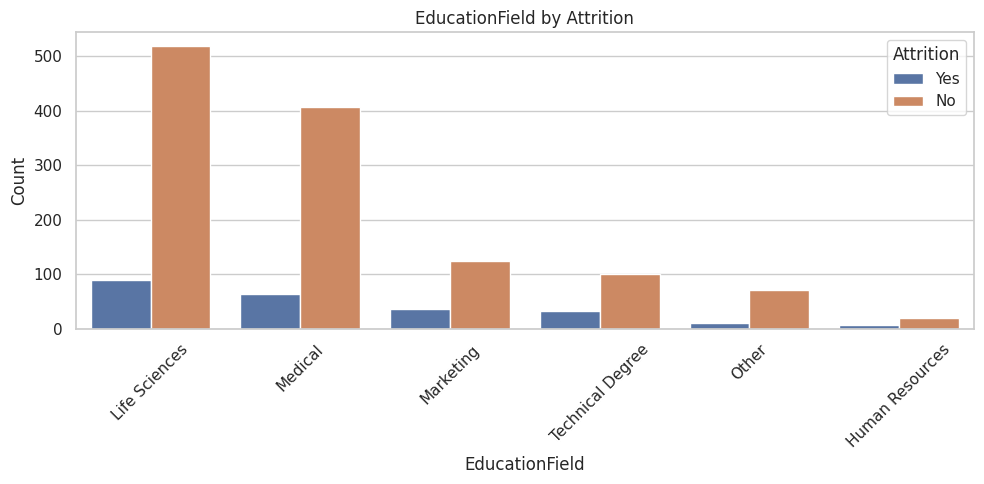

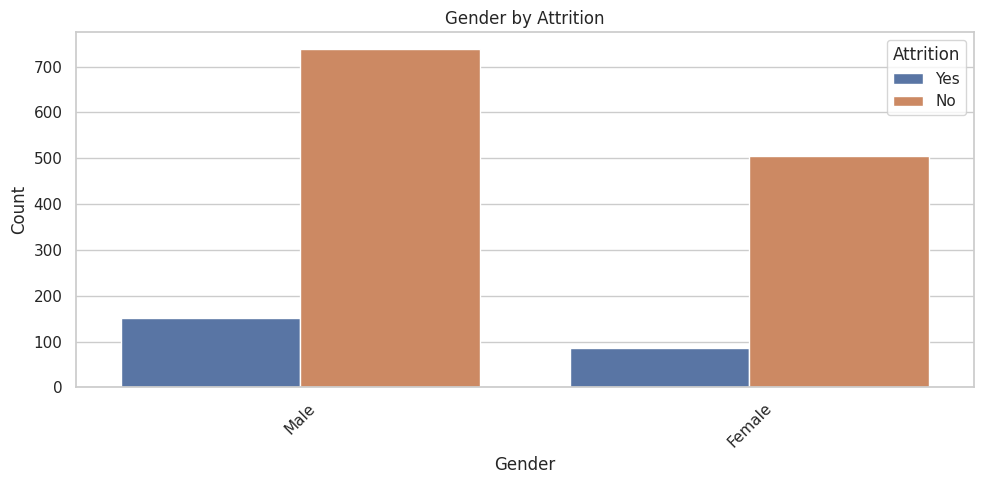

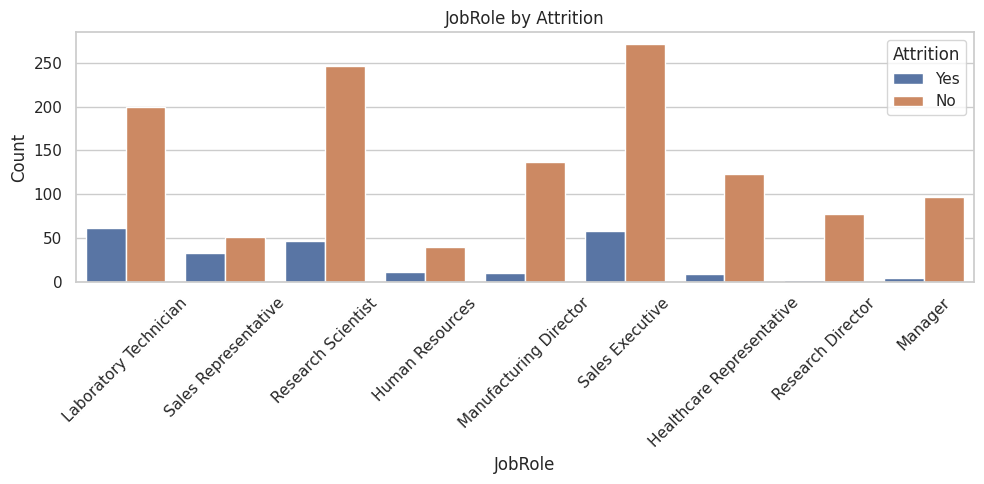

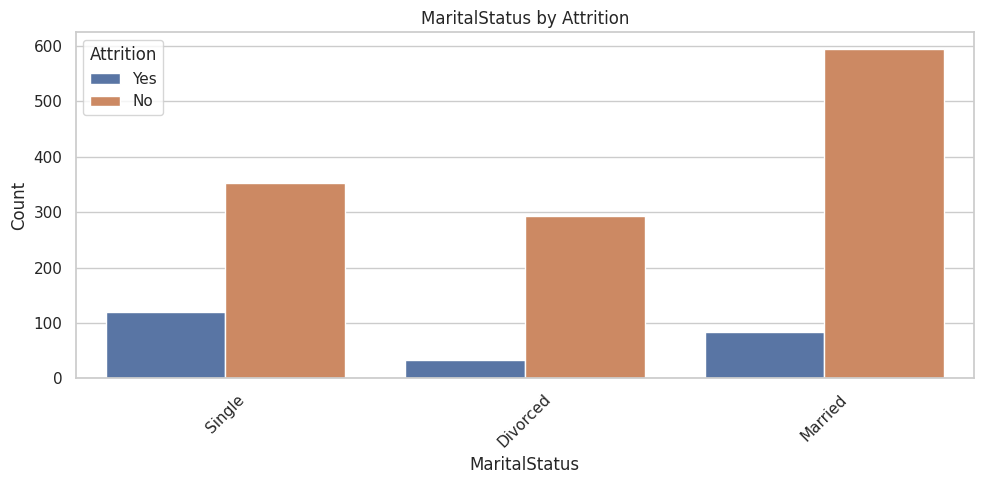

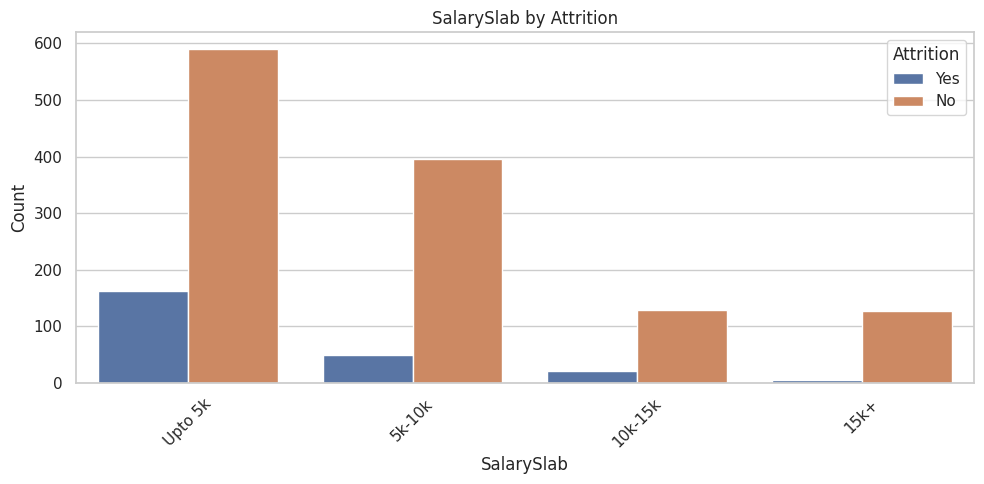

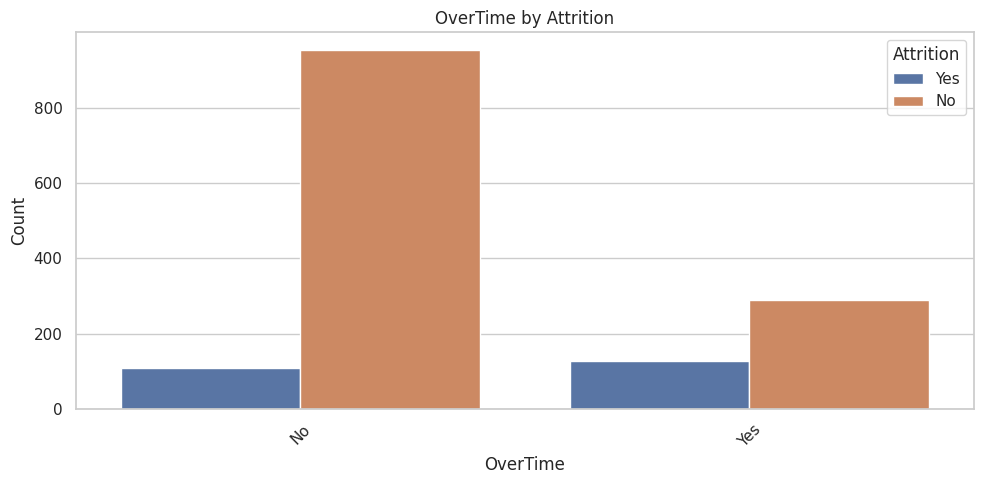

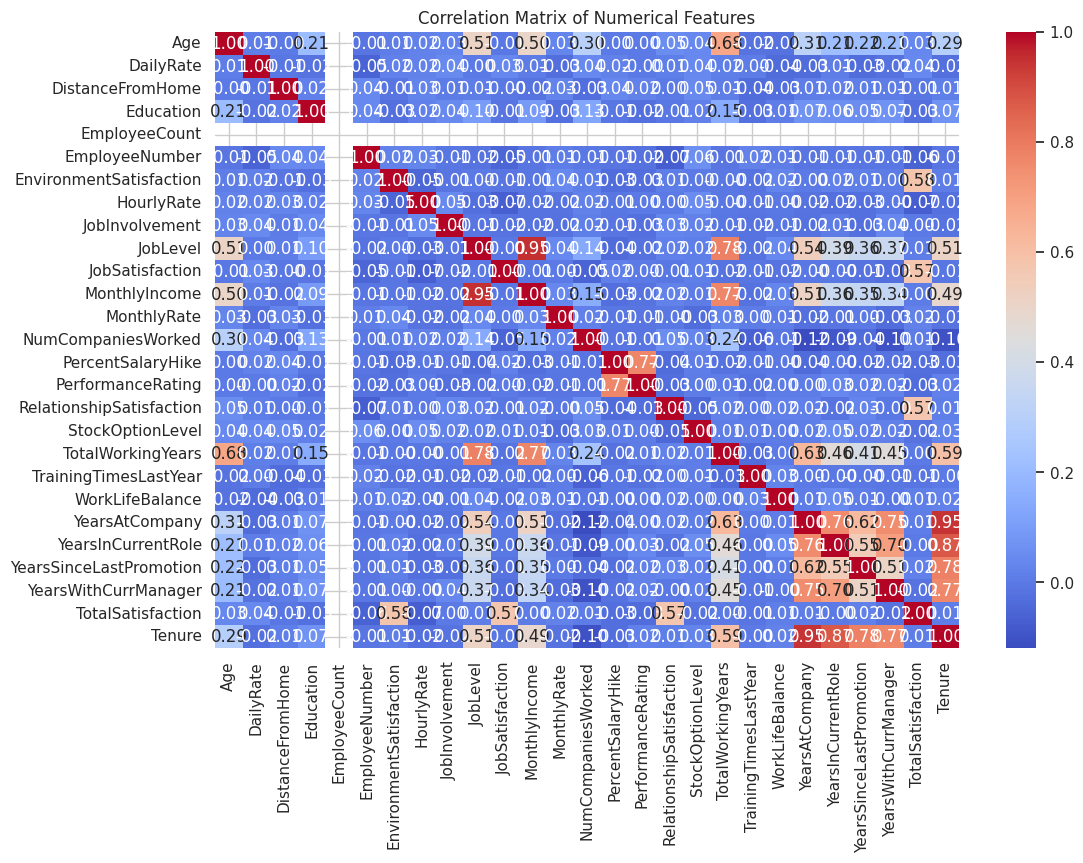

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set(style="whitegrid")


# Loop through each column to plot distributions
for column in hr.columns:
    plt.figure(figsize=(10, 5))

    # Check if column is numerical
    if pd.api.types.is_numeric_dtype(hr[column]):
        # Histogram for numerical columns
        sns.histplot(hr[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        # Bar plot for categorical columns
        sns.countplot(data=hr, x=column, hue='Attrition')
        plt.title(f'Distribution of {column} by Attrition')
        plt.xlabel(column)
        plt.ylabel('Count')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Bivariate Analysis ###

# Numerical vs. Attrition (boxplots)
for column in hr.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=hr, x='Attrition', y=column)
    plt.title(f'{column} by Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

# Categorical vs. Attrition (countplots with hue)
for column in hr.select_dtypes(include=['object', 'category']).columns:
    if column != 'Attrition':  # Exclude target variable
        plt.figure(figsize=(10, 5))
        sns.countplot(data=hr, x=column, hue='Attrition')
        plt.title(f'{column} by Attrition')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


### Multivariate Analysis ###

# Correlation Heatmap for Numerical Features
plt.figure(figsize=(12, 8))
correlation_matrix = hr.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()